In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 

In [19]:
file_list = glob.glob("cluster_mode_res_additional/*")
df = pd.read_csv(file_list[0],index_col=0)
df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
df[df['seed'] == 5]

is_baseline  seed cluster_number cluster_mode  test_Y_MRR  test_Y_NDCG_5  \
0        False     5      50,50,100     separate    0.122041       0.108152   
0        False     5    100,100,200     separate    0.125646       0.111212   
0        False     5    150,150,300     separate    0.123675       0.111284   
0        False     5    200,200,400     separate    0.121302       0.109161   
0        False     5    250,250,500     separate    0.128810       0.115509   
0        False     5    300,300,600     separate    0.130057       0.114968   
0        False     5    350,350,700     separate    0.126657       0.112873   
0        False     5    400,400,800     separate    0.128176       0.117688   
0        False     5    450,450,900     separate    0.126216       0.111488   
0        False     5   500,500,1000     separate    0.131022       0.118830   
0        False     5      50,50,100        joint    0.122041       0.108152   
0        False     5    100,100,200        joint    0.125646       0.111212   
0        False     5    150,150,300        joint    0.123675       0.111284   
0        False     5    200,200,400        joint    0.121302       0.109161   
0        False     5    250,250,500        joint    0.128810       0.115509   
0        False     5    300,300,600        joint    0.130057       0.114968   
0        False     5    350,350,700        joint    0.126657       0.112873   
0        False     5    400,400,800        joint    0.128176       0.117688   
0        False     5    450,450,900        joint    0.126216       0.111488   
0        False     5   500,500,1000        joint    0.131022       0.118830   
0         True     5            NaN          NaN    0.119858       0.105344   

   test_Y_NDCG_10  test_Y_HR_5  test_Y_HR_10  test_Y_MRR_male  \
0        0.128845     0.208140      0.304651         0.128273   
0        0.134952     0.215116      0.325581         0.129998   
0        0.132858     0.219767      0.319767         0.129476   
0        0.132620     0.219767      0.329070         0.127613   
0        0.139121     0.223256      0.333721         0.131274   
0        0.140197     0.215116      0.333721         0.135194   
0        0.133105     0.213953      0.309302         0.129703   
0        0.136648     0.230233      0.319767         0.133380   
0        0.133388     0.212791      0.312791         0.129367   
0        0.141434     0.230233      0.337209         0.133878   
0        0.128845     0.208140      0.304651         0.128273   
0        0.134952     0.215116      0.325581         0.129998   
0        0.132858     0.219767      0.319767         0.129476   
0        0.132620     0.219767      0.329070         0.127613   
0        0.139121     0.223256      0.333721         0.131274   
0        0.140197     0.215116      0.333721         0.135194   
0        0.133105     0.213953      0.309302         0.129703   
0        0.136648     0.230233      0.319767         0.133380   
0        0.133388     0.212791      0.312791         0.129367   
0        0.141434     0.230233      0.337209         0.133878   
0        0.130257     0.208140      0.324419         0.123473   

   test_Y_NDCG_5_male  test_Y_NDCG_10_male  test_Y_HR_5_male  \
0            0.114762             0.136500          0.221145   
0            0.115077             0.138964          0.221145   
0            0.117743             0.137903          0.231329   
0            0.114138             0.138790          0.224054   
0            0.116442             0.141864          0.221145   
0            0.119478             0.147333          0.222599   
0            0.116046             0.136078          0.219690   
0            0.122503             0.141423          0.235694   
0            0.114591             0.137513          0.219690   
0            0.120226             0.144302          0.231329   
0            0.114762             0.136500          0.221145   
0            0.115077             0.138964          0.221145   
0

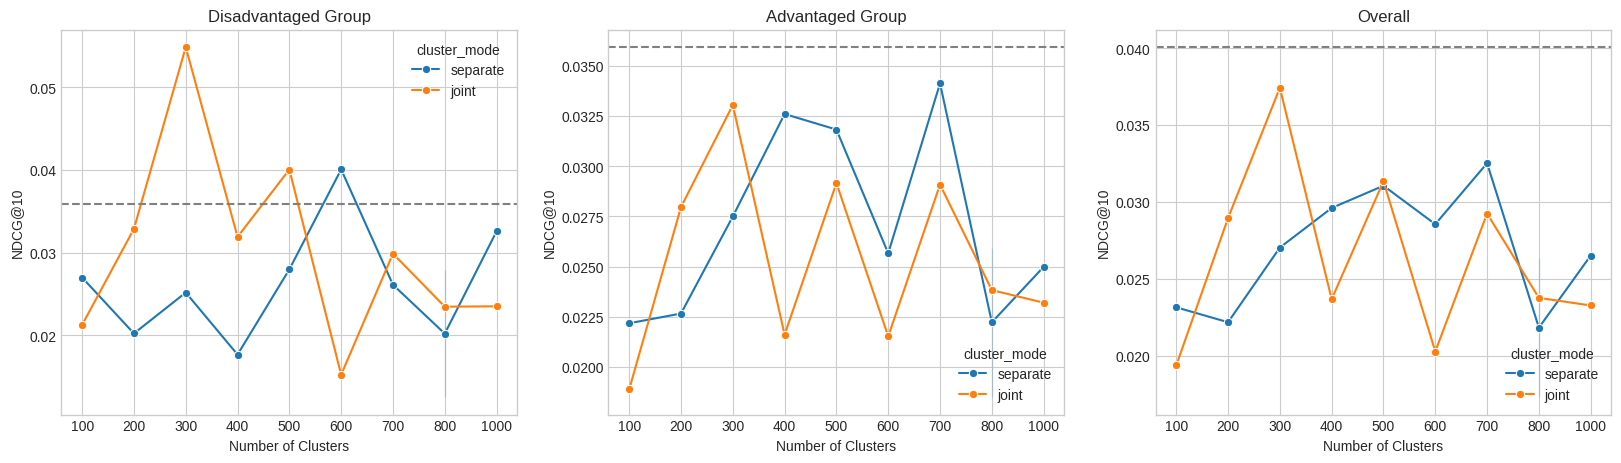

In [136]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
seed = 3
metric = 'test_Y_NDCG_5'
sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster_mode",marker='o',ax=axes[0])              
axes[0].set_title('Disadvantaged Group')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('NDCG@10')
axes[0].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster_mode",marker='o',ax=axes[1])   

axes[1].set_title('Advantaged Group')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('NDCG@10')
axes[1].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')

sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster_mode",marker='o',ax=axes[2])              
axes[2].set_title('Overall')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('NDCG@10')
axes[2].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')

In [45]:
# df[["test_Y_MRR_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]]  = df[["test_Y_MRR_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]] - df[["test_Y_MRR_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]]
df_new = df[["test_Y_MRR_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)

# Rename the new columns appropriately
df_new.columns = ['A_minus_D', 'B_minus_E', 'C_minus_F']
df[["test_Y_MRR_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new

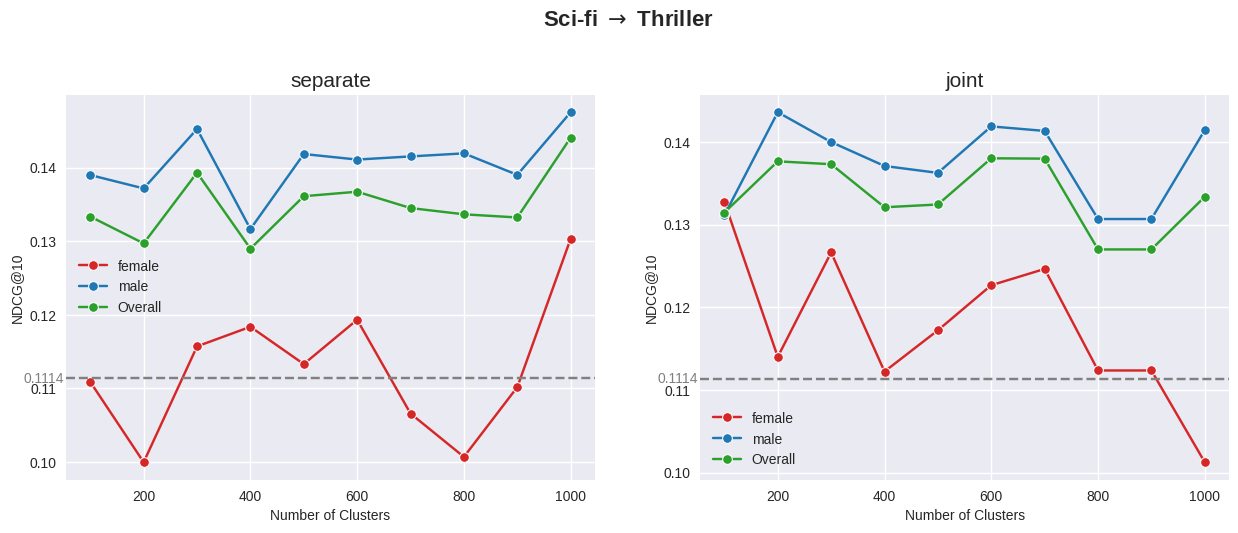

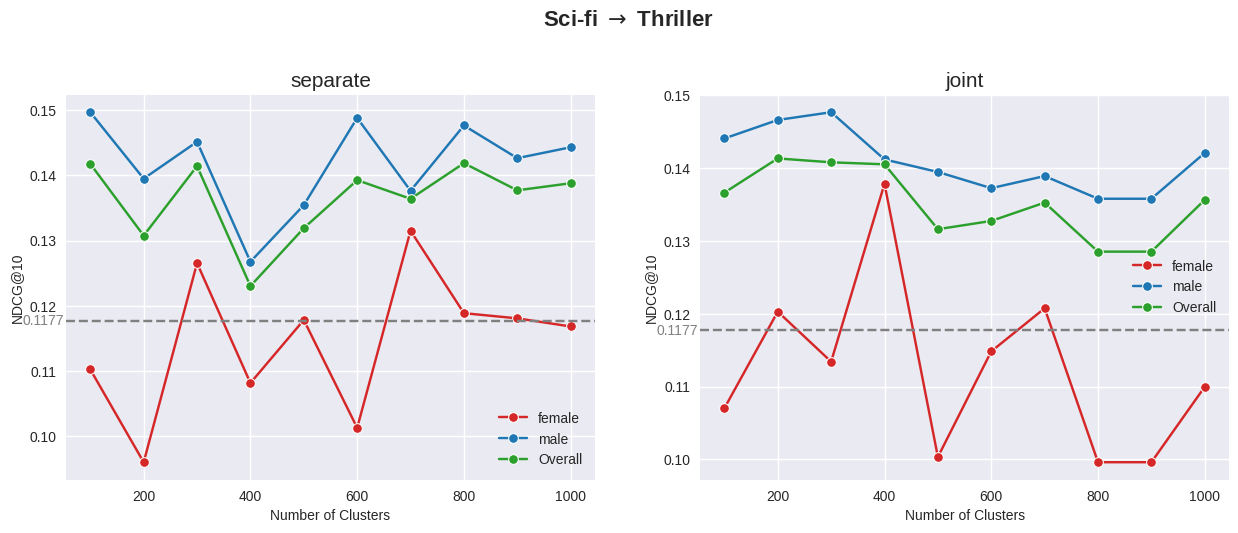

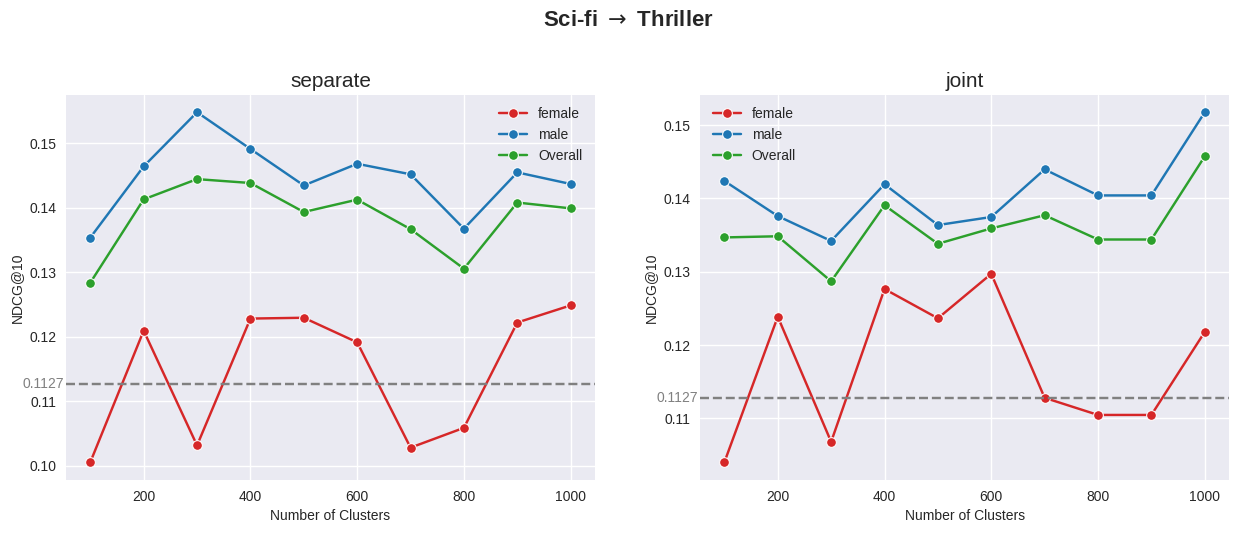

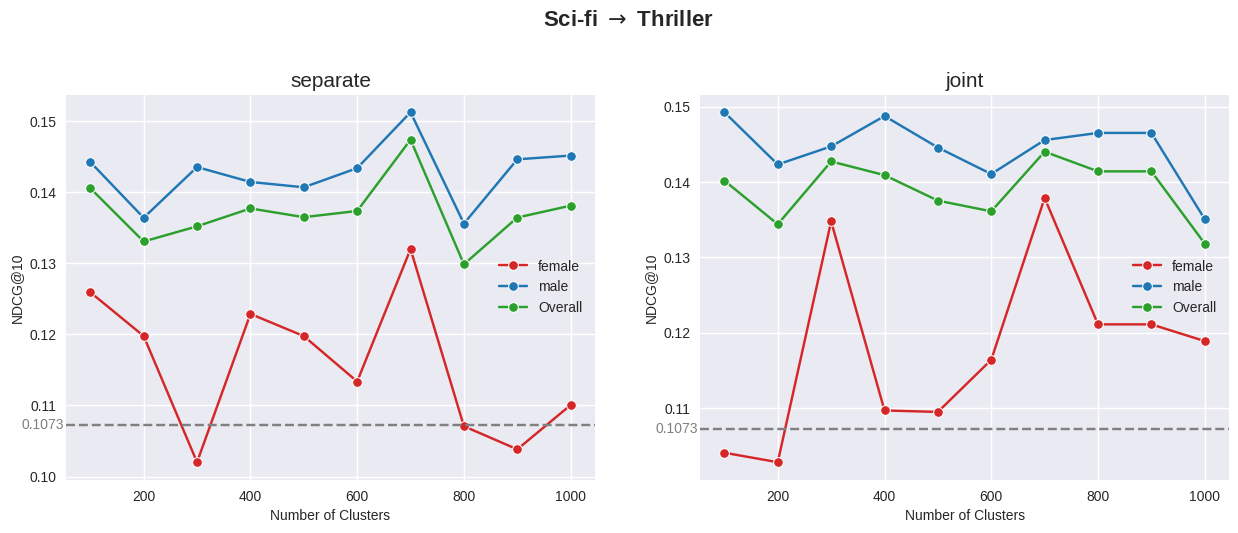

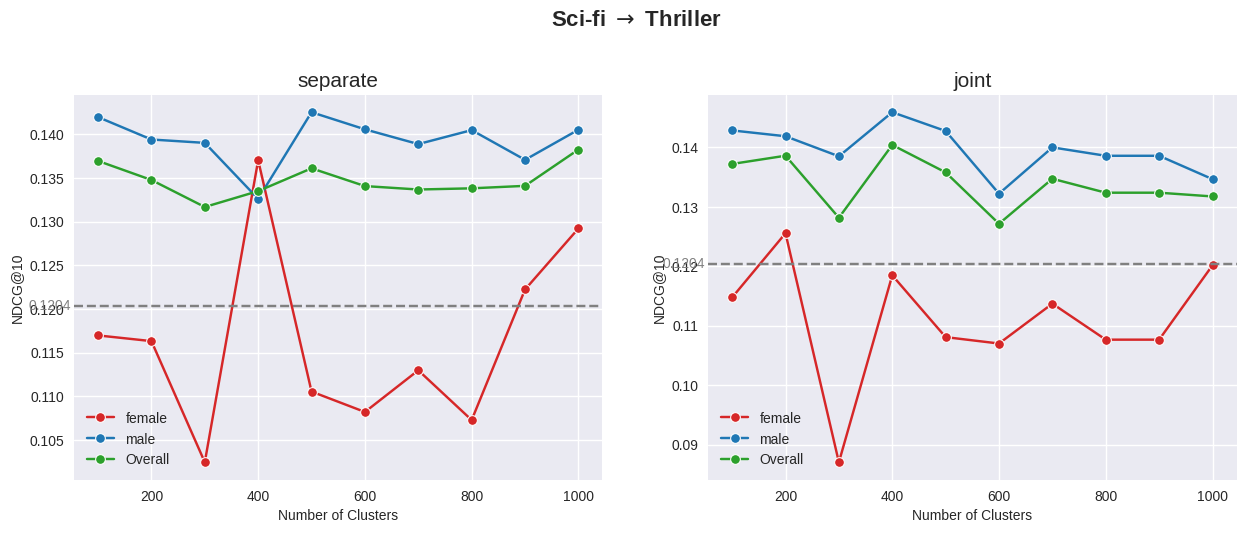

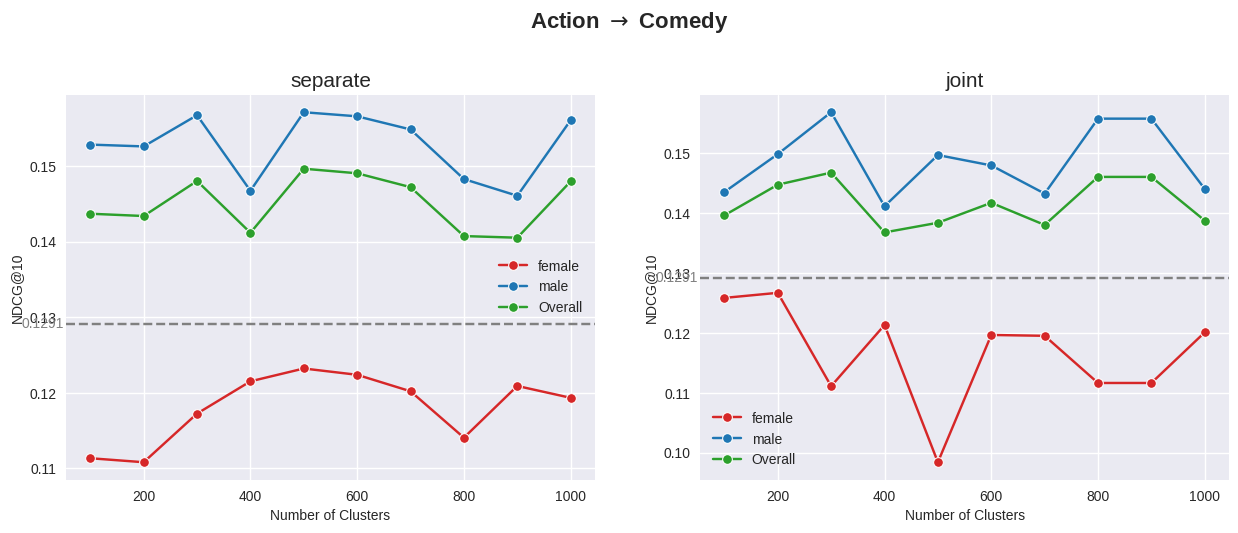

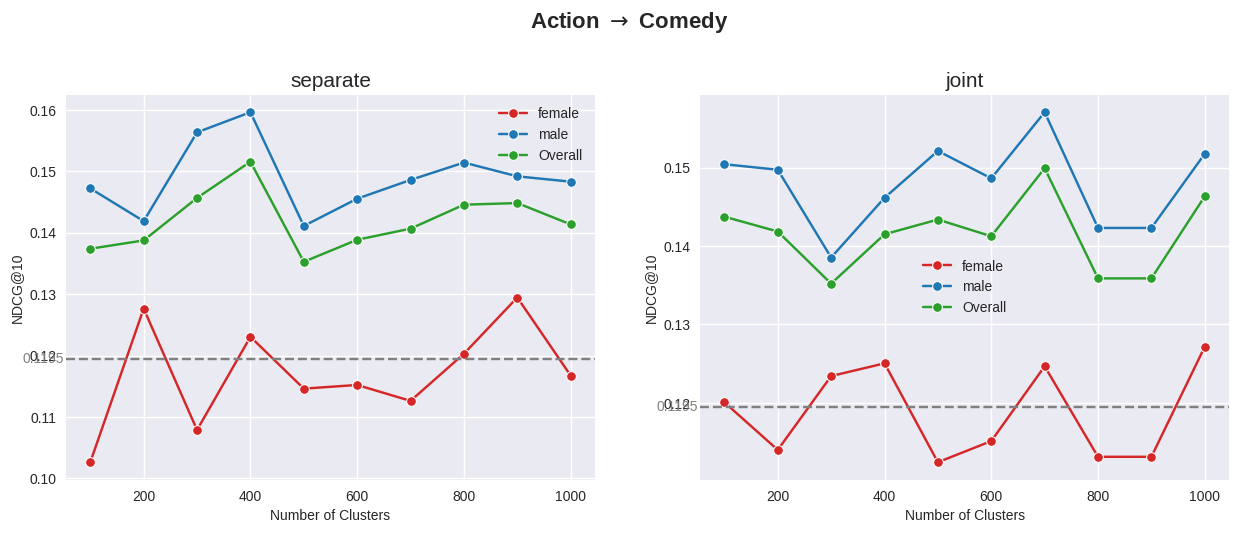

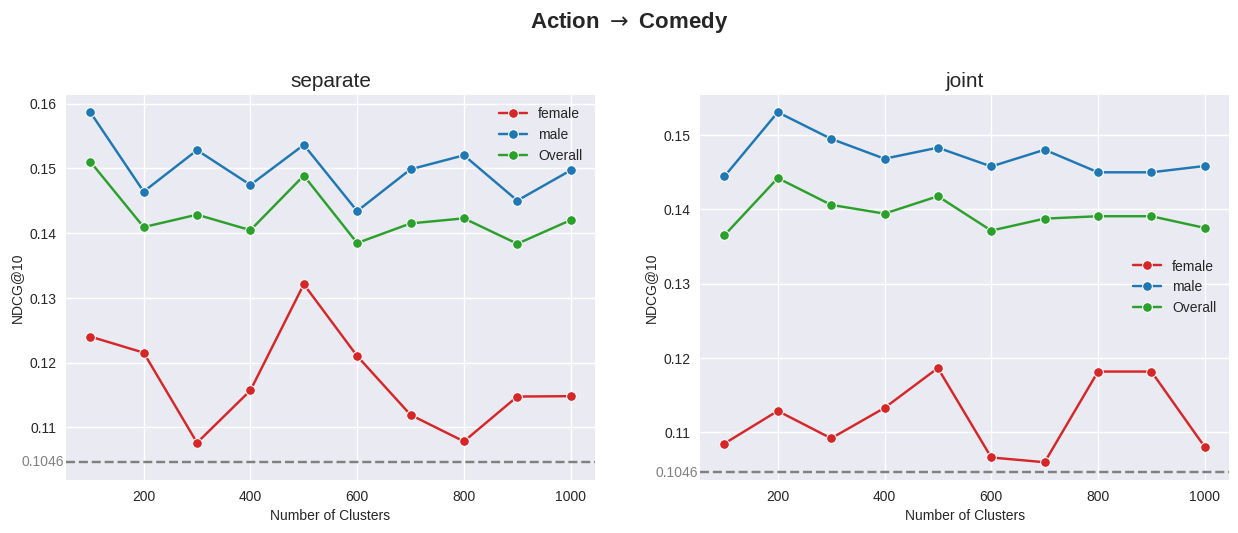

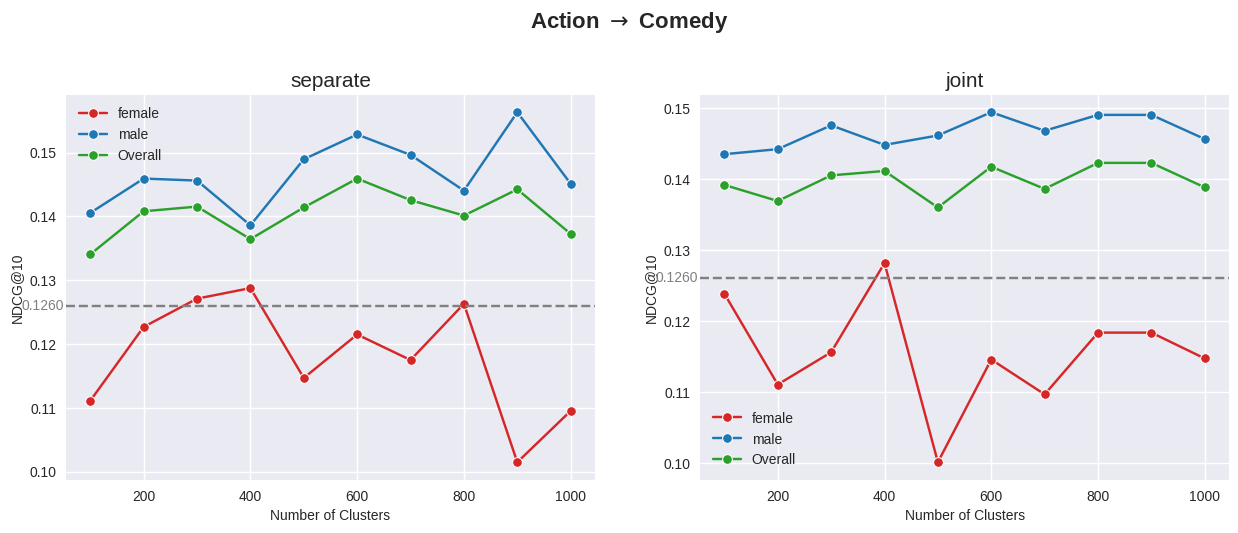

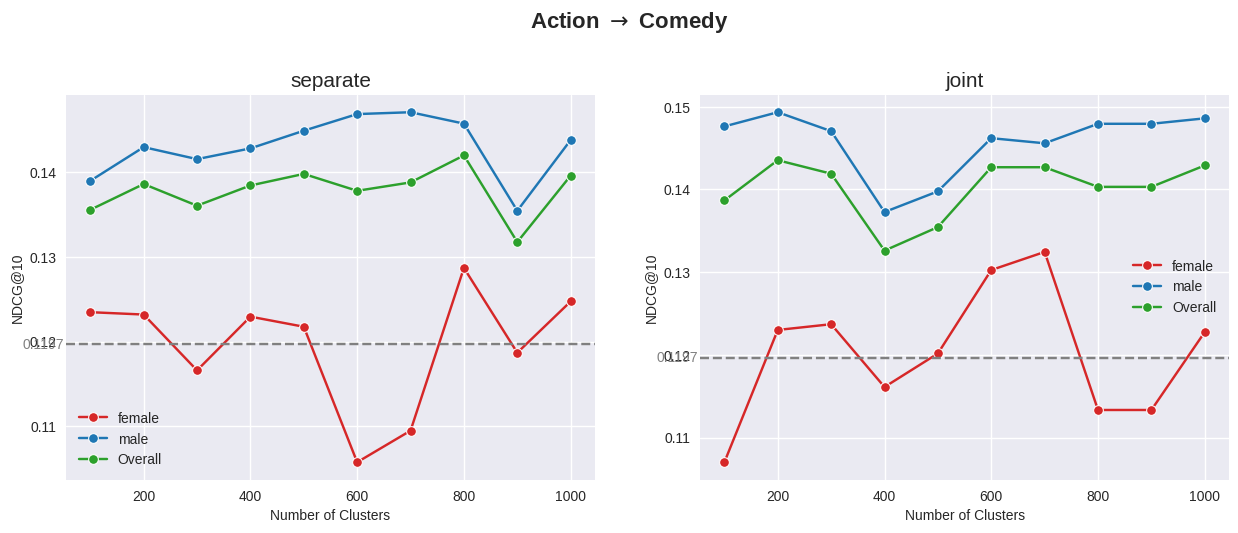

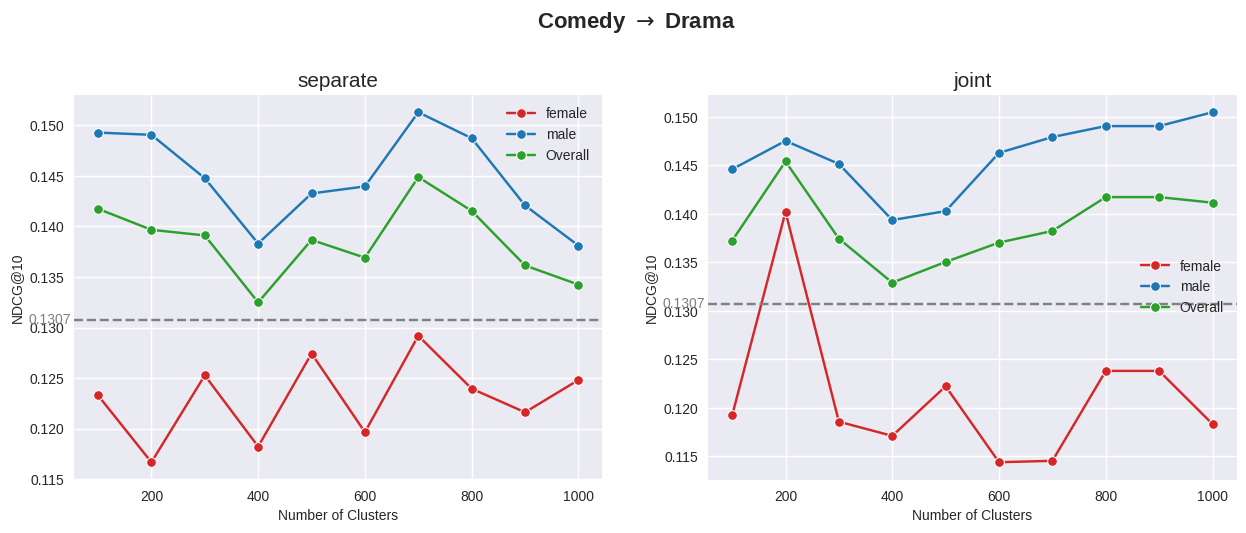

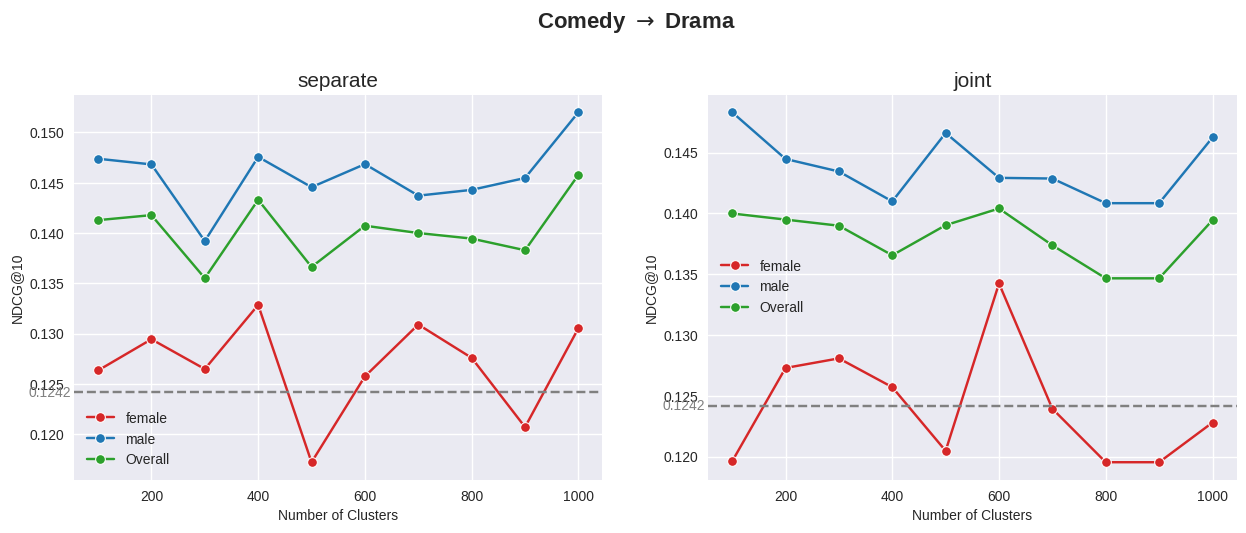

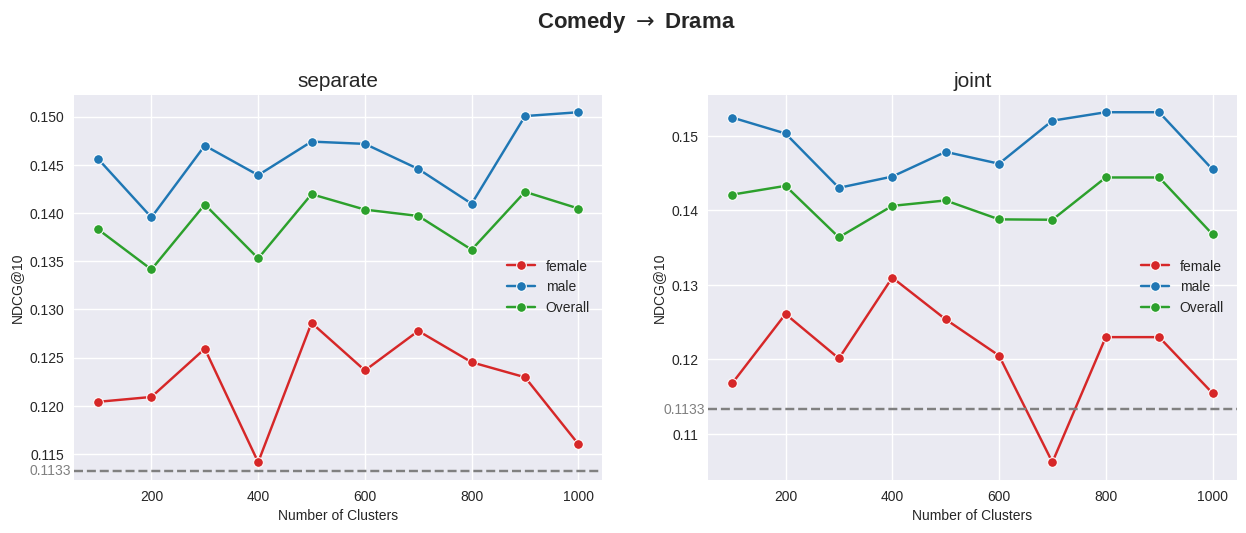

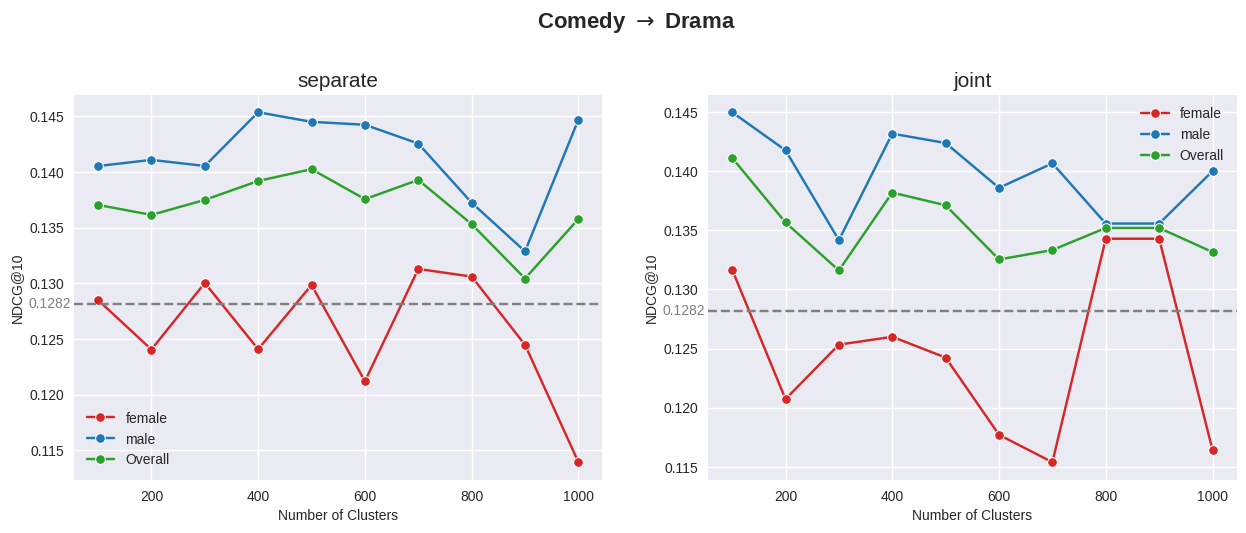

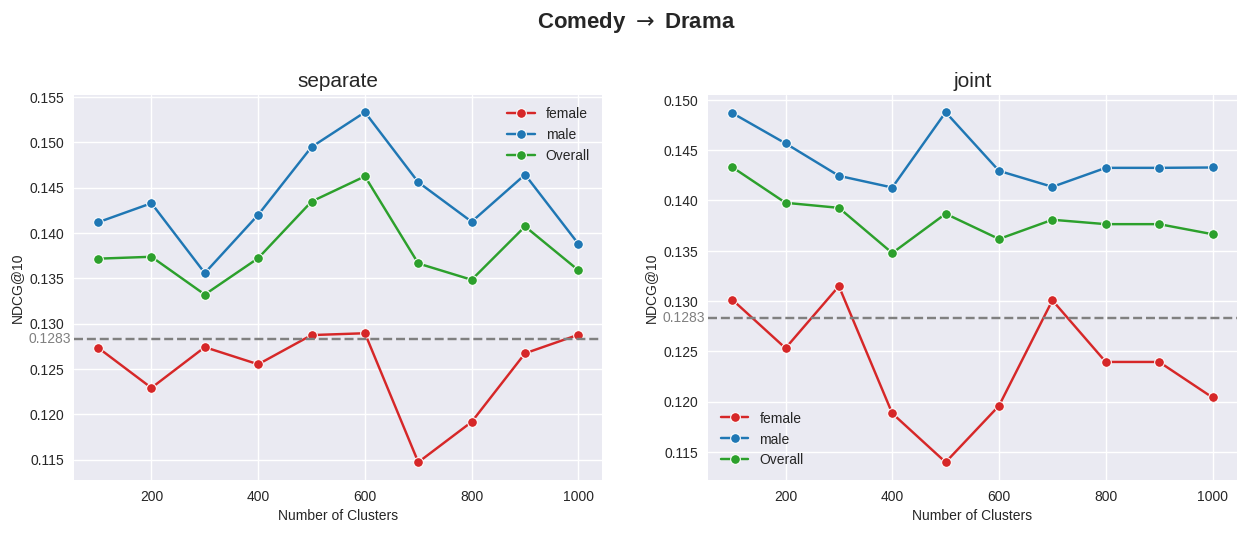

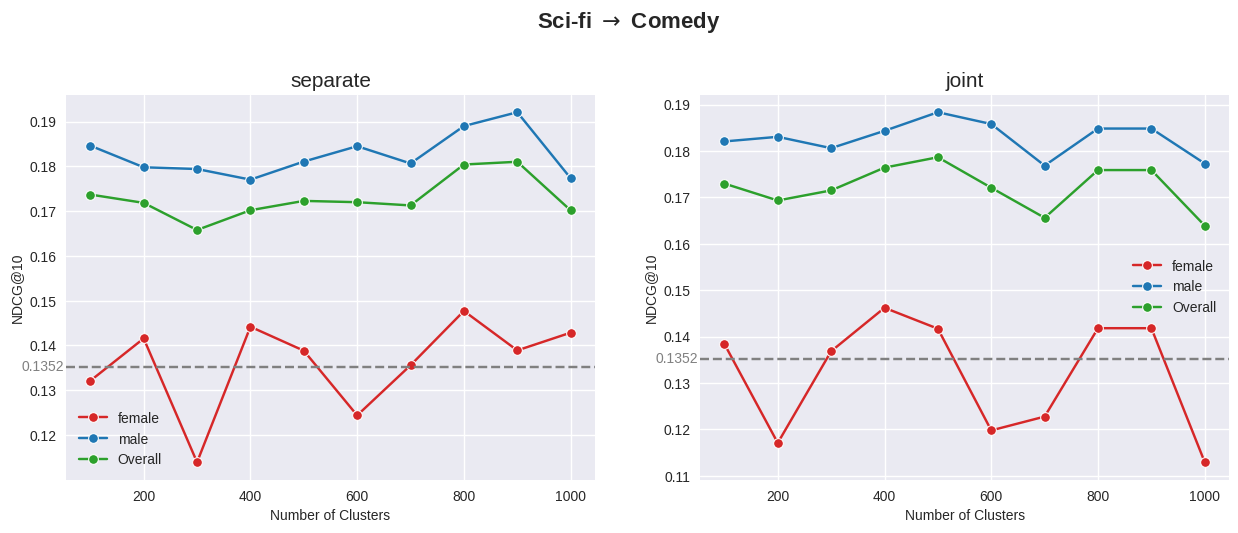

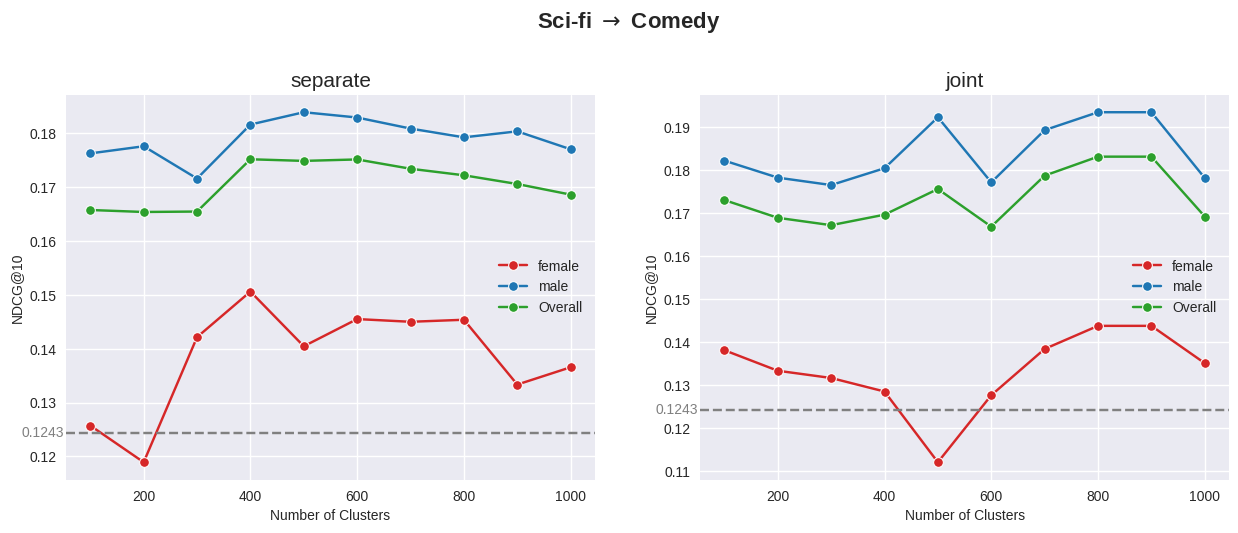

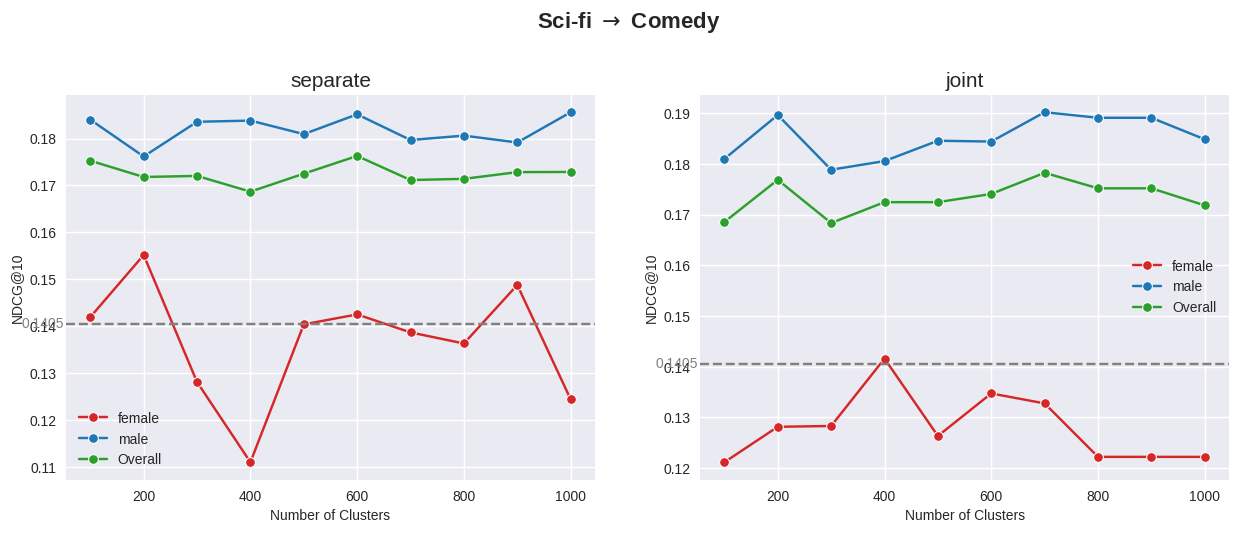

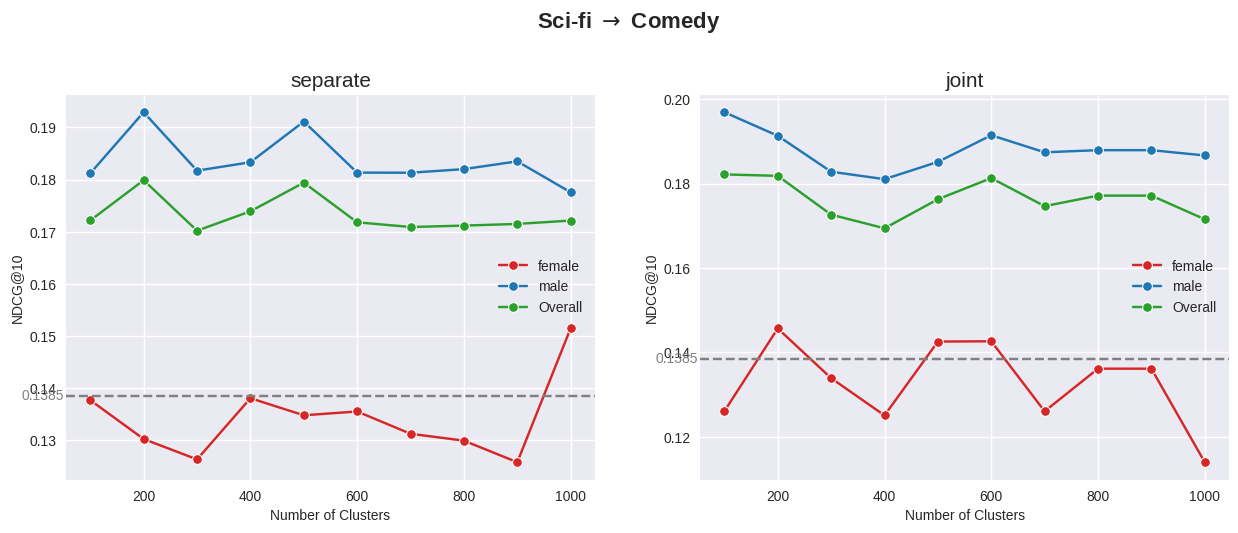

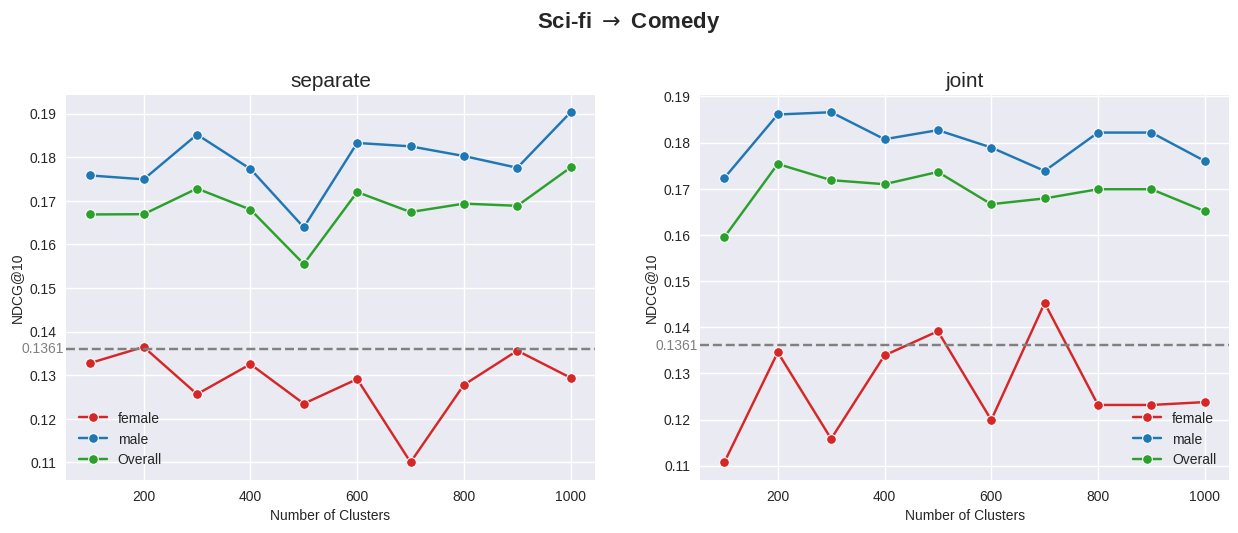

In [18]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
def plot_cluster_mode(file_name,seed, metric):
    plt.style.use("seaborn-v0_8")
    color = sns.color_palette("tab10")
    df = pd.read_csv(file_name,index_col=0)
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    df['total_cluster'] = pd.to_numeric(df['total_cluster'], errors='coerce')
    df.loc[df['cluster_number']=="450,450,800",'total_cluster'] = 900.0
    #calculate the UGF
    df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
    df[["test_Y_MRR_UGF","test_Y_HR_10","test_Y_HR_10","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
    
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    metric_name = '@'.join(metric.split('_')[-2:])
    # plot the result of separate cluster mode
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    for mode, i in zip(["separate",'joint'],[0,1]):
        sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])& (df['cluster mode']==mode)], x="total_cluster", y=f"{metric}_female",marker='o',ax=axes[i],label="female",color=color[3])           
        sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline']) & (df['cluster mode']==mode)], x="total_cluster", y=f"{metric}_male", marker='o',ax=axes[i],label="male",color=color[0])
        sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline']) & (df['cluster mode']==mode)], x="total_cluster", y=f"{metric}", marker='o',ax=axes[i],label="Overall",color=color[2])   
        axes[i].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
        axes[i].set_title(mode, fontsize=15)
        axes[i].set_xlabel('Number of Clusters')
        axes[i].set_ylabel(metric_name)
        axes[i].legend() 
        # add annotation for baseline value to the plot
        baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0]
        x_lim = axes[i].get_xlim()  # Returns a tuple (x_min, x_max)
        x_pos = x_lim[0]-5 
        axes[i].text(
        x=x_pos,  # Replace with the appropriate x position for your text
        y=baseline_value,
        s=f"{baseline_value:.4f}",
        va='center',
        ha='right',
        color='gray'
        )
        file = file_name.split('/')[-1][:-4].split("_")
        fig.suptitle(rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
    
folder = "cluster_mode_res_additional"
file_list = glob.glob(f"{folder}/*")
for i, file in enumerate(file_list):
    for seed in range(3,8):
        plot_cluster_mode(file,seed, 'test_Y_NDCG_10')
        plt.show()
# folder = "cluster_mode_res_new"
# file_list = glob.glob(f"{folder}/*")
# for i, file in enumerate(file_list):
#     if i==0:
#         plot_seed_result(file,seed, 'test_Y_NDCG_10')
#         plt.show()

# Plot seed result

In [14]:
import pandas as pd
df = pd.read_csv("cluster_mode_res/comedy_drama.csv")
sep_res=df[(df['cluster_mode'] == 'separate')&(df['seed']==4) & (df['cluster_number']=="250,250,500")][['test_Y_NDCG_10','test_Y_NDCG_10_female','test_Y_NDCG_10_male']].values[0]
0.29*sep_res[1]+0.709*sep_res[2],sep_res[0]

(0.13961939433227427, 0.1366301615503102)

In [10]:
joint_res = df[(df['cluster_mode'] == 'joint')&(df['seed']==4) & (df['cluster_number']=="250,250,500")][['test_Y_NDCG_10','test_Y_NDCG_10_female','test_Y_NDCG_10_male']].values[0]
f"x*{joint_res[1]}+y*{joint_res[2]} = {joint_res[0]}"

'x*0.1204673306912702+y*0.1466078340344546 = 0.1390252769446071'

In [11]:
baseline_res = df[(df['is_baseline'])&(df['seed']==4)][['test_Y_NDCG_10','test_Y_NDCG_10_female','test_Y_NDCG_10_male']].values[0]
f"x*{baseline_res[1]}+y*{baseline_res[2]} = {baseline_res[0]}"

'x*0.1241753865705223+y*0.1433382119009481 = 0.1377796648766952'

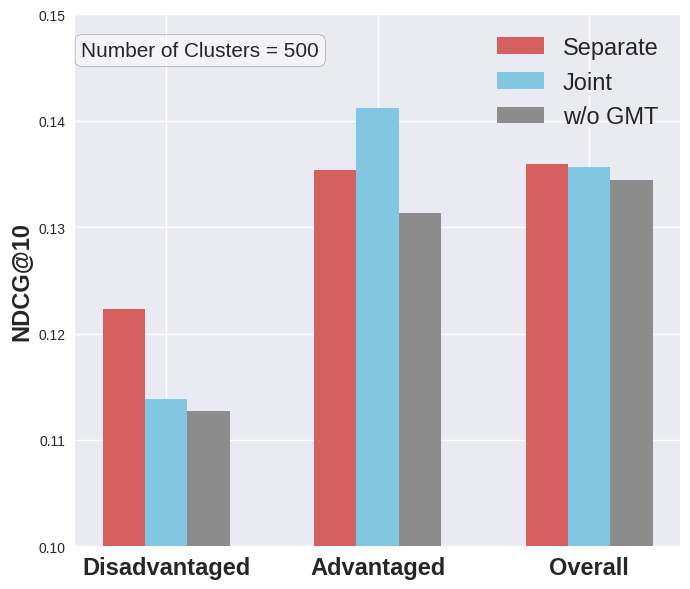

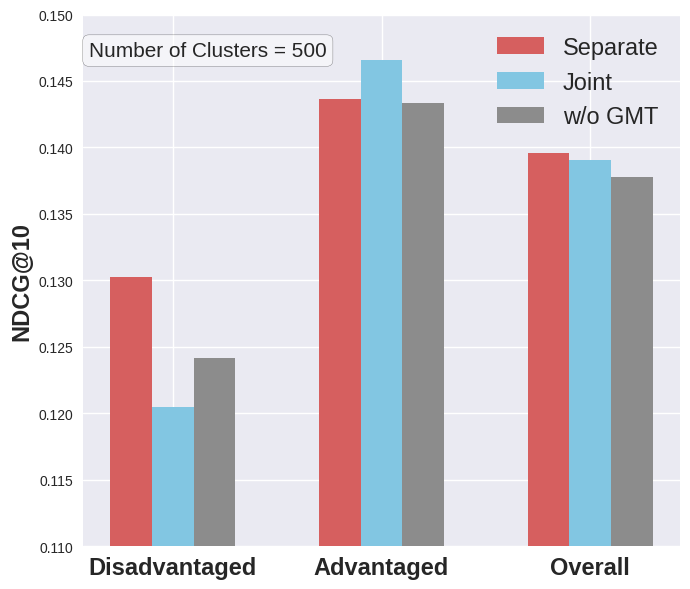

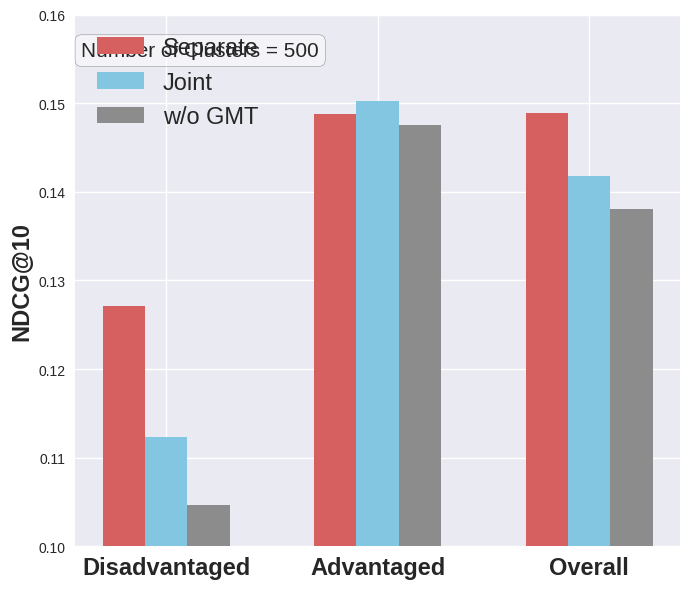

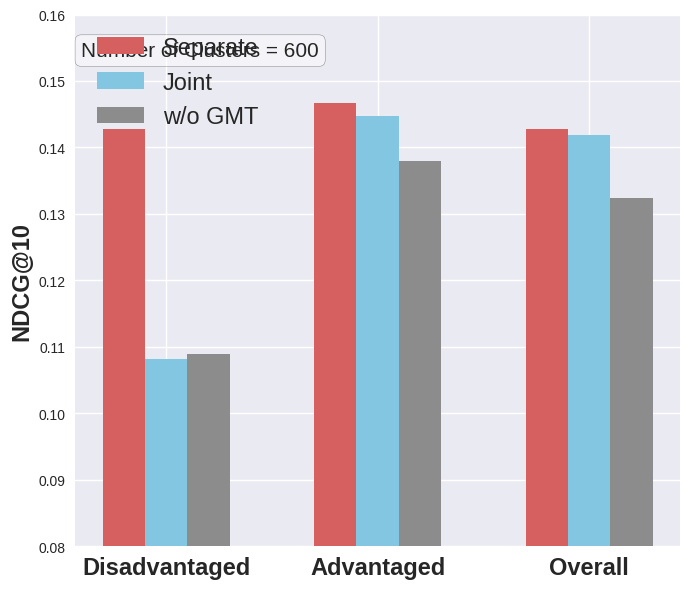

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the provided CSV file
file_paths = ["cluster_mode_res_additional/sci-fi_thriller.csv","cluster_mode_res/comedy_drama.csv","cluster_mode_res/action_comedy.csv","cluster_mode_res/drama_sci-fi.csv"]
seeds = [7,4,5,7]
cluster_nums = [500,500,500,600]
yticks = [[0.10,0.15],[0.11,0.15],[0.10,0.16],[0.08,0.16]]
plt.style.use("seaborn-v0_8")
# Filter data for cluster number of 500 and not baseline
for file_path, seed, cluster_num,ytick in zip(file_paths,seeds,cluster_nums,yticks):
    df = pd.read_csv(file_path)

    # Clean and prepare the data
    df = df.drop(df[df['cluster_number'] == "450,450,800"].index, axis=0)
    df['total_cluster'] = df['cluster_number'].apply(lambda x: int(x.split(',')[-1]) if pd.notnull(x) else x)
    df['total_cluster'] = df['total_cluster'].fillna(0)

    # Calculate the UGF (Utility Gap Fairness)
    metric_components = ["test_Y_MRR_male", "test_Y_HR_5_male", "test_Y_HR_10_male",
                        "test_Y_NDCG_5_male", "test_Y_NDCG_10_male"]
    df_new = df[metric_components].subtract(
        df[["test_Y_MRR_female", "test_Y_HR_5_female", "test_Y_HR_10_female",
            "test_Y_NDCG_5_female", "test_Y_NDCG_10_female"]].values
    )
    df[["test_Y_MRR_UGF", "test_Y_HR_5_UGF", "test_Y_HR_10_UGF",
        "test_Y_NDCG_5_UGF", "test_Y_NDCG_10_UGF"]] = df_new
    df = df[df['seed'] == seed]

    df_cluster_500 = df[(df['total_cluster'] == cluster_num) & (~df['is_baseline'])]

    # Also, extract the baseline values for comparison
    df_baseline = df[(df['is_baseline'])]

    # Prepare the data for bar plot
    bar_data = {
        'Group': ['Disadvantaged', 'Advantaged', 'Overall', 'UGF'],
        'Separate': df_cluster_500[df_cluster_500['cluster_mode'] == 'separate'][['test_Y_NDCG_10_female','test_Y_NDCG_10_male','test_Y_NDCG_10','test_Y_NDCG_10_UGF']].values[0],
        'Joint': df_cluster_500[df_cluster_500['cluster_mode'] == 'joint'][['test_Y_NDCG_10_female','test_Y_NDCG_10_male','test_Y_NDCG_10','test_Y_NDCG_10_UGF']].values[0],
        'Baseline': df_baseline[['test_Y_NDCG_10_female','test_Y_NDCG_10_male','test_Y_NDCG_10','test_Y_NDCG_10_UGF']].values[0]
    }

    # Convert to DataFrame
    bar_df = pd.DataFrame(bar_data)
    colors = sns.color_palette("muted")
    deep_color = sns.color_palette("deep")
    # Convert to DataFrame
    df_to_plot = bar_df.iloc[:-1,:]

    # Set up the matplotlib figure and axes
    fig, ax = plt.subplots(figsize=(7, 6))

    # Our bar plot
    x = np.arange(len(df_to_plot['Group']))  # the label locations
    width = 0.2  # the width of the bars

    rects1 = ax.bar(x - width, df_to_plot['Separate'], width, label='Separate',color = colors[3])
    rects2 = ax.bar(x, df_to_plot['Joint'], width, label='Joint',color = colors[-1])
    rects3 = ax.bar(x + width, df_to_plot['Baseline'], width, label='w/o GMT',color = deep_color[7])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.text(0.01, 0.95, f'Number of Clusters = {cluster_num}', transform=ax.transAxes, fontsize=15,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    ax.set_ylabel('NDCG@10',fontsize=17,fontweight='bold')
    # ax.set_title('Performance by group and cluster mode')
    ax.set_xticks(x)
    ax.set_xticklabels(df_to_plot['Group'],fontsize=17,fontweight='bold')
    ax.set_ylim(ytick[0], ytick[1])
    ax.legend(fontsize=17,title_fontsize='x-large',loc="best")
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)

    
    # Function to attach a text label above each bar, displaying its height
    # def autolabel(rects):
    #     for rect in rects:
    #         height = rect.get_height()
    #         ax.annotate('{}'.format(round(height, 4)),
    #                     xy=(rect.get_x() + rect.get_width() / 2, height),
    #                     xytext=(0, 3),  # 3 points vertical offset
    #                     textcoords="offset points",
    #                     ha='center', va='bottom')

    # # Call the function to attach the text labels
    # autolabel(rects1)
    # autolabel(rects2)
    # autolabel(rects3)

    # Show the plot
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_2670858/2424339177.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ugf_df=ugf_df.append(df)
/tmp/ipykernel_2670858/2424339177.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ugf_df=ugf_df.append(df)
/tmp/ipykernel_2670858/2424339177.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ugf_df=ugf_df.append(df)
/tmp/ipykernel_2670858/2424339177.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ugf_df=ugf_df.append(df)


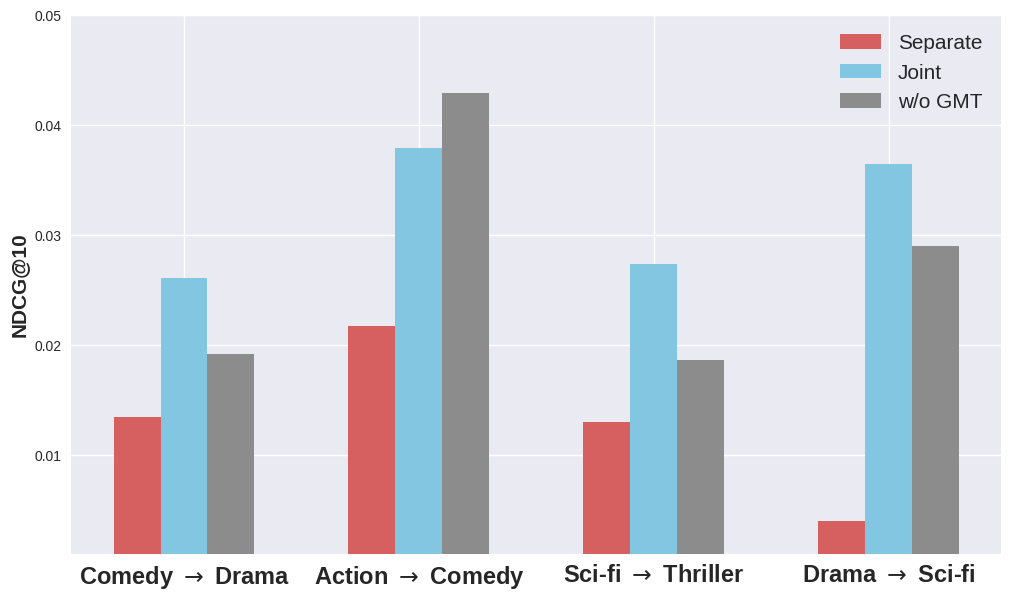

In [11]:
file_paths = ["cluster_mode_res/comedy_drama.csv","cluster_mode_res/action_comedy.csv","cluster_mode_res_additional/sci-fi_thriller.csv","cluster_mode_res/drama_sci-fi.csv"]
seeds = [4,5,7,7]
cluster_nums = [500,500,500,600]
yticks = [[0.11,0.15],[0.10,0.16],[0.10,0.15],[0.08,0.16]]
# Filter data for cluster number of 500 and not baseline
ugf_df = pd.DataFrame()
for file_path, seed, cluster_num,ytick in zip(file_paths,seeds,cluster_nums,yticks):
    df = pd.read_csv(file_path)

    # Clean and prepare the data
    df = df.drop(df[df['cluster_number'] == "450,450,800"].index, axis=0)
    df['total_cluster'] = df['cluster_number'].apply(lambda x: int(x.split(',')[-1]) if pd.notnull(x) else x)
    df['total_cluster'] = df['total_cluster'].fillna(0)

    # Calculate the UGF (Utility Gap Fairness)
    metric_components = ["test_Y_MRR_male", "test_Y_HR_5_male", "test_Y_HR_10_male",
                        "test_Y_NDCG_5_male", "test_Y_NDCG_10_male"]
    df_new = df[metric_components].subtract(
        df[["test_Y_MRR_female", "test_Y_HR_5_female", "test_Y_HR_10_female",
            "test_Y_NDCG_5_female", "test_Y_NDCG_10_female"]].values
    )
    df[["test_Y_MRR_UGF", "test_Y_HR_5_UGF", "test_Y_HR_10_UGF",
        "test_Y_NDCG_5_UGF", "test_Y_NDCG_10_UGF"]] = df_new
    df = df[df['seed'] == seed]

    df_cluster_500 = df[(df['total_cluster'] == cluster_num) & (~df['is_baseline'])]

    # Also, extract the baseline values for comparison
    df_baseline = df[(df['is_baseline'])]

    file = file_path.split('/')[-1][:-4].split("_")
    # fig.suptitle(rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
    # Prepare the data for bar plot
    bar_data = {
        'Scenario': [rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}'],
        'Separate': df_cluster_500[df_cluster_500['cluster_mode'] == 'separate']['test_Y_NDCG_10_UGF'].values[0],
        'Joint': df_cluster_500[df_cluster_500['cluster_mode'] == 'joint']['test_Y_NDCG_10_UGF'].values[0],
        'Baseline': df_baseline['test_Y_NDCG_10_UGF'].values[0]
    }
    df = pd.DataFrame(bar_data)
    ugf_df=ugf_df.append(df)
# Convert to DataFrame
colors = sns.color_palette("muted")
deep_color = sns.color_palette("deep")
# Convert to DataFrame
df_to_plot = ugf_df

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Our bar plot
x = np.arange(len(df_to_plot['Scenario']))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax.bar(x - width, df_to_plot['Separate'], width, label='Separate',color = colors[3])
rects2 = ax.bar(x, df_to_plot['Joint'], width, label='Joint',color = colors[-1])
rects3 = ax.bar(x + width, df_to_plot['Baseline'], width, label='w/o GMT',color = deep_color[7])

ax.set_ylabel('NDCG@10',fontsize=15,fontweight='bold')
# ax.set_title('Performance by group and cluster mode')
ax.set_xticks(x)
ax.set_xticklabels(df_to_plot['Scenario'],fontsize=17,fontweight='bold')
ax.set_ylim(0.001, 0.05)
ax.legend(fontsize=15,title_fontsize='x-large',loc="best")
# break

In [132]:
ugf_df

Scenario  Separate     Joint  Baseline
0  Sci-fi $\rightarrow$ Thriller  0.013020  0.027344  0.018622
0     Comedy $\rightarrow$ Drama  0.013444  0.026141  0.019163
0    Action $\rightarrow$ Comedy  0.021724  0.037910  0.042910
0     Drama $\rightarrow$ Sci-fi  0.003995  0.036481  0.029051

Seed: 7


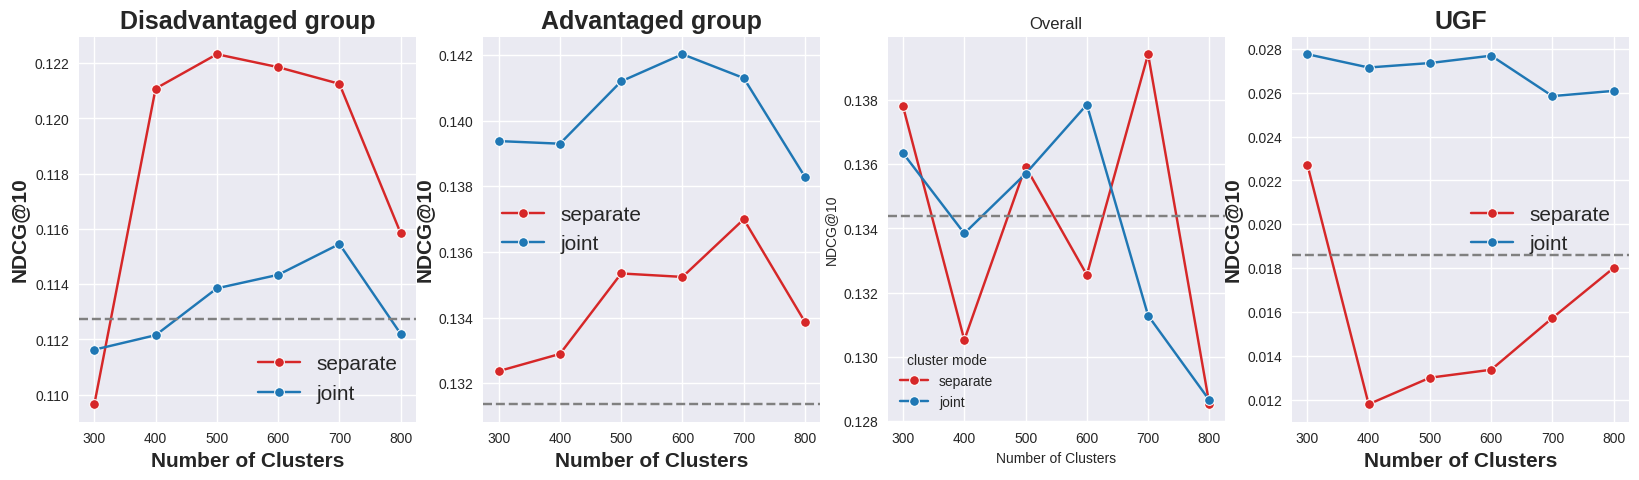

In [35]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
folder = "cluster_mode_res"
file_list = glob.glob(f"{folder}/*")
def plot_seed_result(file_name,seed, metric):
    plt.style.use("seaborn-v0_8")
    color = sns.color_palette("tab10")
    palette = {"separate": color[3], "joint": color[0]}
    df = pd.read_csv(file_name,index_col=0)
    # drop invalid cluster number(450,450,800)
    df.reset_index(drop=True,inplace=True)
    df = df.drop(df[df['cluster_number']=="450,450,800"].index,axis=0)
    # extract the last number of cluster number
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    df['total_cluster'] = df.loc[pd.notnull(df['total_cluster']),'total_cluster'].astype(int)
    df['total_cluster'] = df['total_cluster'].fillna(0)
    #calculate the UGF
    df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
    df[["test_Y_MRR_UGF","test_Y_HR_5_UGF","test_Y_HR_10_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
    
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    # plot the average value of NDCG@10 for each cluster mode under different number of clusters
    fig, axes = plt.subplots(1,4,figsize=(20,5))
    metric_name = '@'.join(metric.split('_')[-2:])
    #get cluster number between 300 and 900
    df = df[((df['total_cluster']<=800) & (df['total_cluster']>=300))| df['is_baseline']]
    # female
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)           
    axes[0].set_title('Disadvantaged group',fontsize=18, fontweight='bold')
    axes[0].set_xlabel('Number of Clusters',fontsize=15, fontweight='bold')
    axes[0].set_ylabel(metric_name,fontsize=15, fontweight='bold')
    axes[0].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
    axes[0].legend(fontsize=15, title_fontsize='x-large')
    # male
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster mode",marker='o',ax=axes[1],palette=palette)              
    axes[1].set_title('Advantaged group',fontsize=18, fontweight='bold')
    axes[1].set_xlabel('Number of Clusters',fontsize=15, fontweight='bold')
    axes[1].set_ylabel(metric_name,fontsize=15, fontweight='bold')
    axes[1].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_male"].values[0], color='gray', linestyle='--')
    axes[1].legend(fontsize=15, title_fontsize='x-large')

    # Overall
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster mode",marker='o',ax=axes[2],palette=palette)              
    axes[2].set_title('Overall')
    axes[2].set_xlabel('Number of Clusters')
    axes[2].set_ylabel(metric_name)
    axes[2].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')
    # baseline_value = df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0]
    # x_lim = axes[2].get_xlim()  # Returns a tuple (x_min, x_max)
    # x_pos = x_lim[0] 
    # axes[2].text(
    # x=x_pos,  # Replace with the appropriate x position for your text
    # y=baseline_value,
    # s=f"{baseline_value:.4f}",
    # va='center',
    # ha='right',
    # color='gray'
    # )
    # UGF
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_UGF", hue="cluster mode",marker='o',ax=axes[3],palette=palette)
    axes[3].set_title('UGF',fontsize=18, fontweight='bold')
    axes[3].set_xlabel('Number of Clusters',fontsize=15, fontweight='bold')
    axes[3].set_ylabel(metric_name,fontsize=15, fontweight='bold')
    axes[3].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_UGF"].values[0], color='gray', linestyle='--')
    axes[3].legend(fontsize=15, title_fontsize='x-large')
    
    # file = file_name.split('/')[-1][:-4].split("_")
    # fig.suptitle(rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
folder = "cluster_mode_res_additional"
file_list = glob.glob(f"{folder}/*")
for i, file in enumerate(file_list):
    for seed in range(0,10):
        if "sci-fi_thriller" in file and seed ==7:            
            print("Seed:",seed)
            plot_seed_result(file,seed, 'test_Y_NDCG_10')
            plt.show()

In [36]:
df[(df['seed']==seed) & (~df['is_baseline'])]

is_baseline  seed cluster_number cluster mode  test_Y_MRR  test_Y_NDCG_5  \
84         False     9      50,50,100     separate    0.144875       0.129482   
85         False     9    100,100,200     separate    0.143317       0.129118   
86         False     9    150,150,300     separate    0.135306       0.118226   
87         False     9    200,200,400     separate    0.142193       0.123948   
88         False     9    250,250,500     separate    0.126845       0.109998   
89         False     9    300,300,600     separate    0.151189       0.135933   
90         False     9    350,350,700     separate    0.139780       0.123354   
91         False     9    400,400,800     separate    0.143726       0.124637   
92         False     9    450,450,900     separate    0.155412       0.140769   
93         False     9   500,500,1000     separate    0.145452       0.129904   
94         False     9      50,50,100        joint    0.134905       0.119857   
95         False     9    100,100,200        joint    0.143740       0.128336   
96         False     9    150,150,300        joint    0.138937       0.122393   
97         False     9    200,200,400        joint    0.136106       0.118555   
98         False     9    250,250,500        joint    0.149872       0.136979   
99         False     9    300,300,600        joint    0.143762       0.128707   
100        False     9    350,350,700        joint    0.146293       0.126555   
101        False     9    400,400,800        joint    0.147042       0.128437   
102        False     9    450,450,900        joint    0.149514       0.135616   
103        False     9   500,500,1000        joint    0.146926       0.131101   

     test_Y_NDCG_10  test_Y_HR_5  test_Y_HR_10  test_Y_MRR_male  ...  \
84         0.150115     0.233026      0.329689         0.152320  ...   
85         0.149978     0.238205      0.334868         0.150698  ...   
86         0.138679     0.212313      0.307250         0.139253  ...   
87         0.144971     0.215765      0.314154         0.143638  ...   
88         0.130362     0.201956      0.296893         0.131193  ...   
89         0.153900     0.239931      0.322785         0.153813  ...   
90         0.142521     0.222670      0.310702         0.142955  ...   
91         0.150280     0.219217      0.338320         0.152080  ...   
92         0.159013     0.252014      0.336594         0.156651  ...   
93         0.152808     0.236479      0.343498         0.147175  ...   
94         0.138952     0.219217      0.307250         0.137208  ...   
95         0.150273     0.233026      0.336594         0.143026  ...   
96         0.142779     0.220944      0.315880         0.143302  ...   
97         0.142590     0.217491      0.327963         0.147117  ...   
98         0.153630     0.250288      0.327963         0.155855  ...   
99         0.148068     0.234753      0.324511         0.146964  ...   
100        0.151006     0.217491      0.331415         0.152758  ...   
101        0.147561     0.222670      0.310702         0.151888  ...   
102        0.150979     0.243383      0.314154         0.157569  ...   
103        0.150058     0.233026      0.321059         0.149372  ...   

     test_Y_NDCG_5_female  test_Y_NDCG_10_female  test_Y_HR_5_female  \
84               0.094976               0.113168            0.171687   
85               0.095657               0.113308            0.171687   
86               0.107024               0.118620            0.198795   
87               0.119119               0.132912            0.198795   
88               0.090051               0.103547            0.153614   
89               0.123890               0.141310            0.216867   
90               0.108302               0.122202            0.189759   
91               0.092560               0.115911            0.180723   
92               0.141017               0.148546            0.253012   
93               0.130285               0.138051            0.243976  

# Plot average result

/tmp/ipykernel_2324129/555171992.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


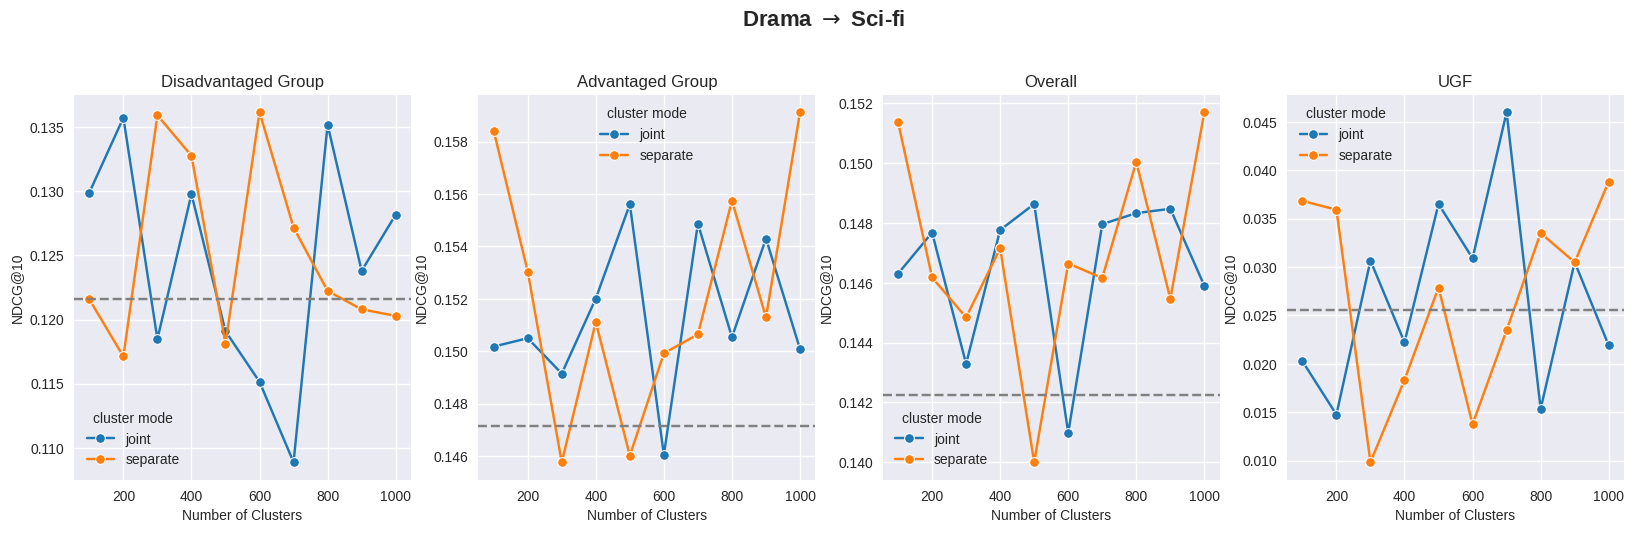

/tmp/ipykernel_2324129/555171992.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


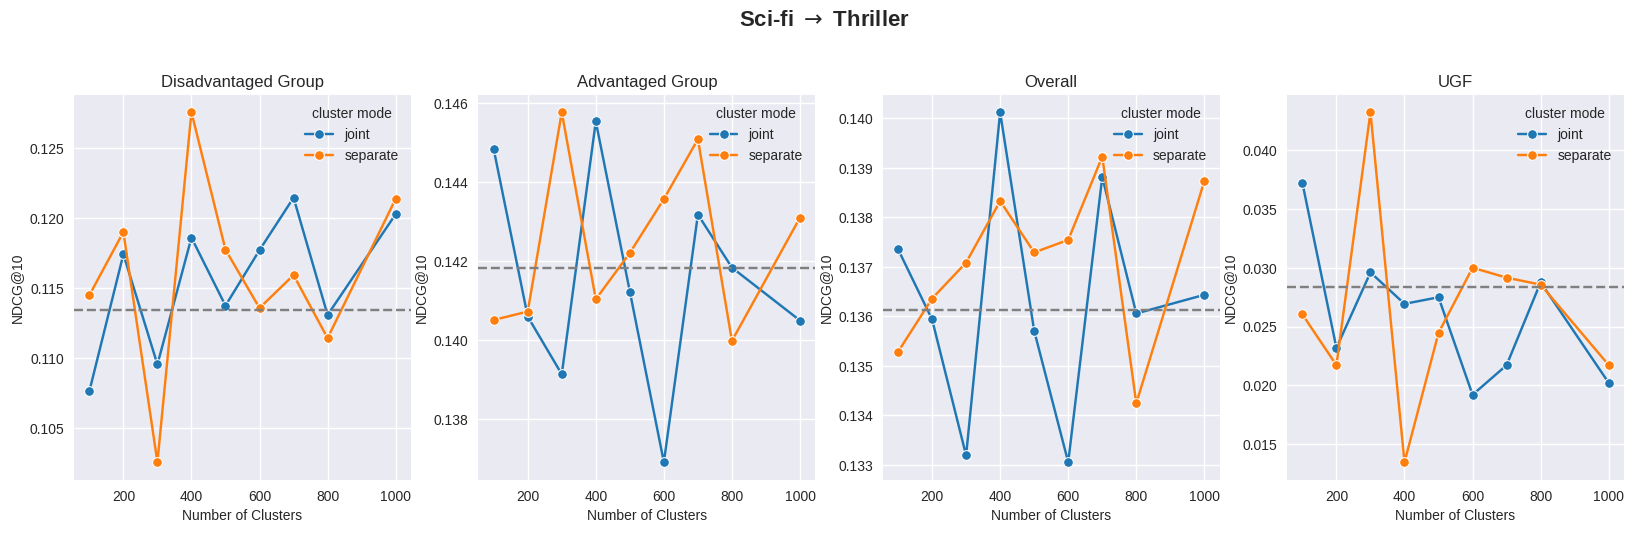

/tmp/ipykernel_2324129/555171992.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


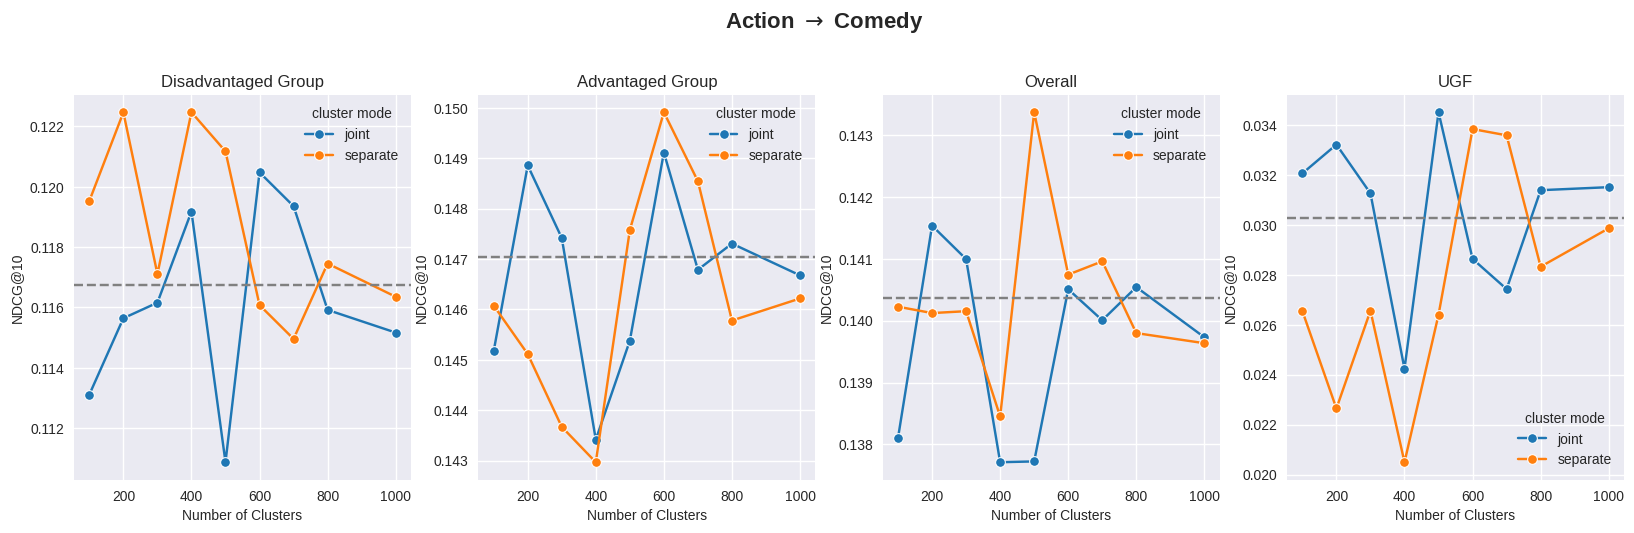

/tmp/ipykernel_2324129/555171992.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


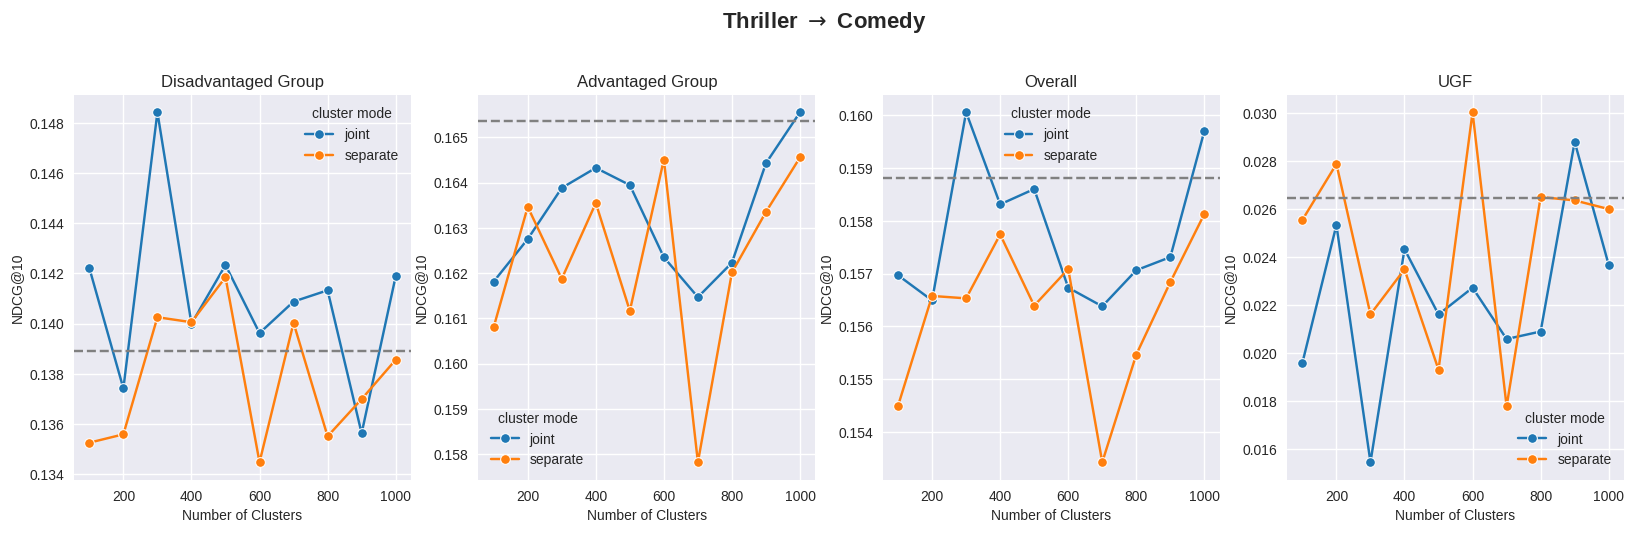

/tmp/ipykernel_2324129/555171992.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


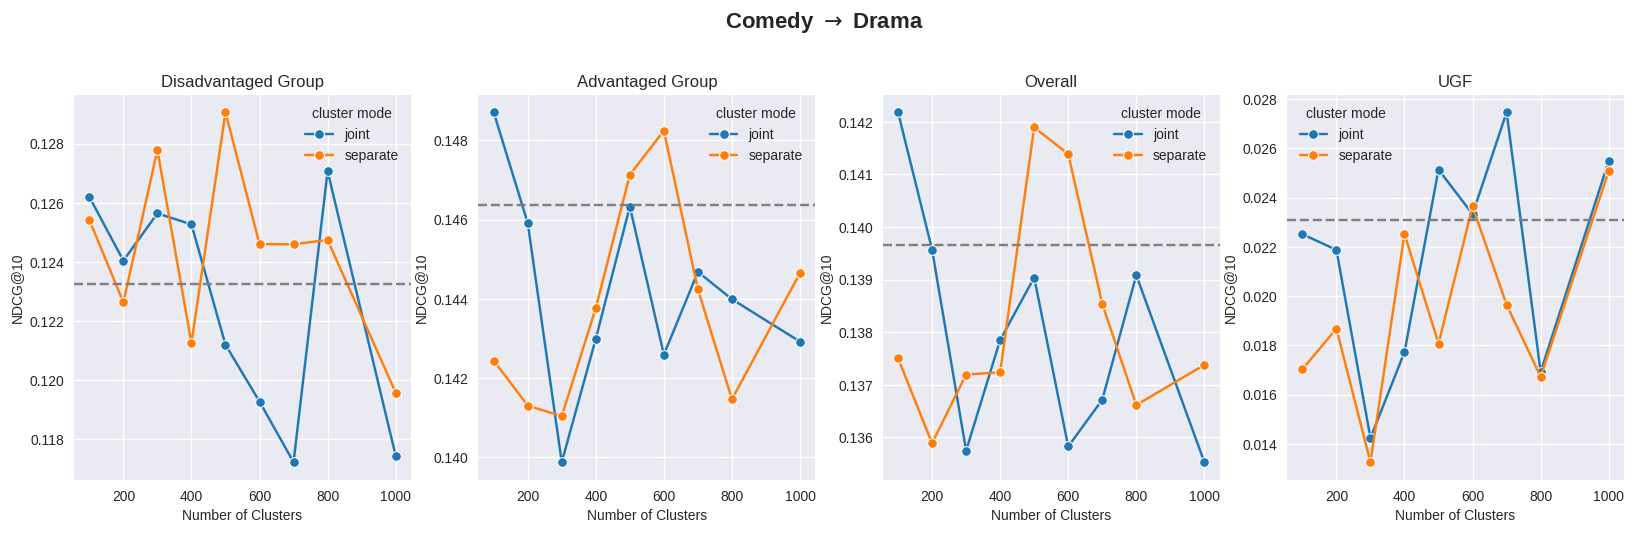

/tmp/ipykernel_2324129/555171992.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


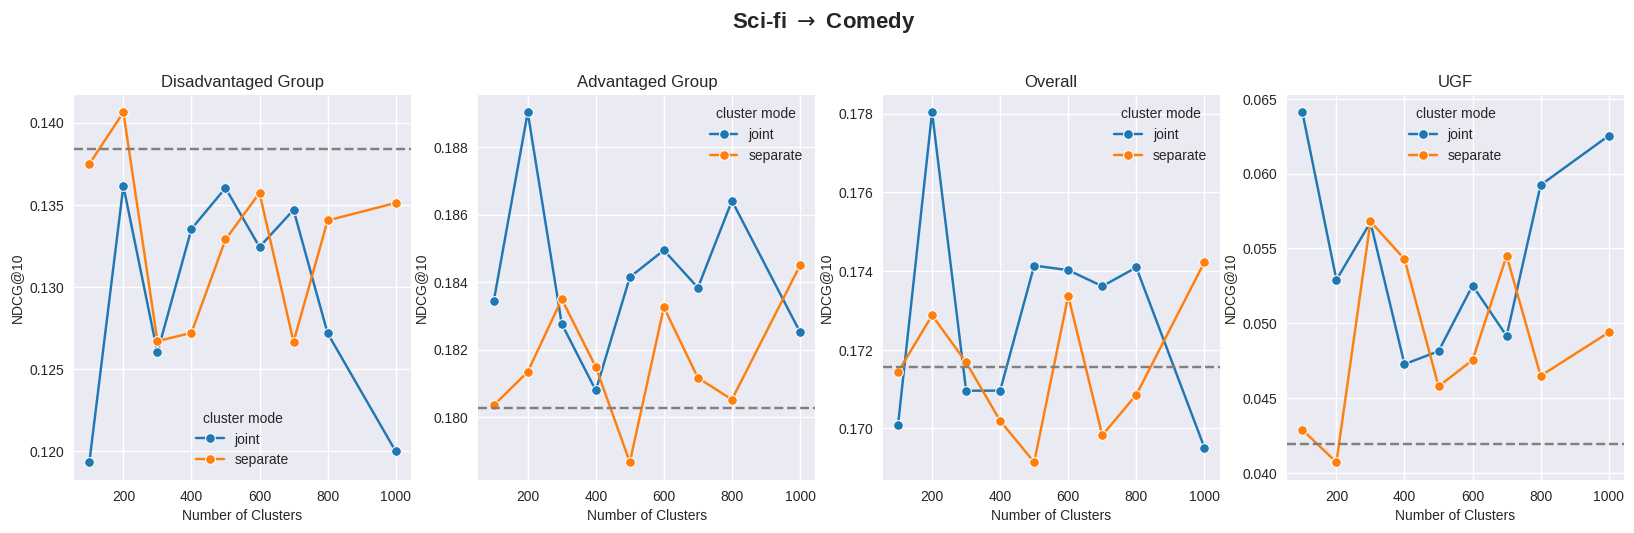

In [31]:
# read in the data
def plot_average_result(file_name, metric):
    plt.style.use("seaborn-v0_8")
    color = sns.color_palette("tab10")
    palette = {"separate": color[1], "joint": color[0]}
    df = pd.read_csv(file_name,index_col=0)
    df.reset_index(drop=True,inplace=True)
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    df['total_cluster'] = df.loc[pd.notnull(df['total_cluster']),'total_cluster'].astype(int)
    df['total_cluster'] = df['total_cluster'].fillna(0)
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    #calculate the UGF
    df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
    df[["test_Y_MRR_UGF","test_Y_HR_5_UGF","test_Y_HR_10_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
    # Group by 'cluster_mode' and 'total_cluster' and calculate the mean
    filtered_df = df[df['seed'].isin(list(range(5,10)))]
    average_df = filtered_df.groupby(['cluster mode', 'total_cluster']).mean(numeric_only=True).reset_index()
    average_df["total_cluster"] = average_df["total_cluster"].astype('int')
    average_df['is_baseline'] = average_df['is_baseline'].astype('bool')
    average_df = average_df.sort_values(by='total_cluster')
    # calculate mean baseline value
    baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()
    baseline_df['is_baseline'] = baseline_df['is_baseline'].astype('bool')
    average_df = pd.concat([average_df, baseline_df], axis=0)
    fig, axes = plt.subplots(1,4,figsize=(20,5))
    metric_name = '@'.join(metric.split('_')[-2:])
    # set avg. seed
    seed = 7
    #female
    sns.lineplot(data=average_df[(~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)           
    axes[0].set_title('Disadvantaged Group')
    axes[0].set_xlabel('Number of Clusters')
    axes[0].set_ylabel(metric_name)
    axes[0].axhline(average_df[(average_df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
    #male
    sns.lineplot(data=average_df[(~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster mode",marker='o',ax=axes[1],palette=palette)              
    axes[1].set_title('Advantaged Group')
    axes[1].set_xlabel('Number of Clusters')
    axes[1].set_ylabel(metric_name)
    axes[1].axhline(average_df[ (average_df['is_baseline'])][f"{metric}_male"].values[0], color='gray', linestyle='--')
    #overall
    sns.lineplot(data=average_df[(~average_df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster mode",marker='o',ax=axes[2],palette=palette)              
    axes[2].set_title('Overall')
    axes[2].set_xlabel('Number of Clusters')
    axes[2].set_ylabel(metric_name)
    axes[2].axhline(average_df[(average_df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')

    # UGF
    sns.lineplot(data=average_df[(~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_UGF", hue="cluster mode",marker='o',ax=axes[3],palette=palette)
    axes[3].set_title('UGF')
    axes[3].set_xlabel('Number of Clusters')
    axes[3].set_ylabel(metric_name)
    axes[3].axhline(average_df[(average_df['is_baseline'])][f"{metric}_UGF"].values[0], color='gray', linestyle='--')
    # baseline_value = df[ (df['is_baseline'])][f"{metric}_UGF"].values[0]
    # x_lim = axes[3].get_xlim()  # Returns a tuple (x_min, x_max)
    # x_pos = x_lim[0] 
    # axes[3].text(
    # x=x_pos,  # Replace with the appropriate x position for your text
    # y=baseline_value,
    # s=f"{baseline_value:.4f}",
    # va='center',
    # ha='right',
    # color='gray'
    # )
    
    file = file_name.split('/')[-1][:-4].split("_")
    fig.suptitle(rf'{file[0].capitalize()} $\rightarrow$ {file[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)

file_list = glob.glob("cluster_mode_res/*")
for i, file in enumerate(file_list):
    # if i==0:
    # if "drama_s" in file:
    plot_average_result(file, 'test_Y_NDCG_10')
    plt.show()



In [29]:
df[(~df['is_baseline'])]

is_baseline  seed cluster_number cluster mode  test_Y_MRR  test_Y_NDCG_5  \
0          False     5      50,50,100     separate    0.138669       0.123133   
1          False     5    100,100,200     separate    0.140346       0.121797   
2          False     5    150,150,300     separate    0.134097       0.117009   
3          False     5    200,200,400     separate    0.148233       0.133625   
4          False     5    250,250,500     separate    0.142601       0.126001   
..           ...   ...            ...          ...         ...            ...   
99         False     9    300,300,600        joint    0.143762       0.128707   
100        False     9    350,350,700        joint    0.146293       0.126555   
101        False     9    400,400,800        joint    0.147042       0.128437   
102        False     9    450,450,900        joint    0.149514       0.135616   
103        False     9   500,500,1000        joint    0.146926       0.131101   

     test_Y_NDCG_10  test_Y_HR_5  test_Y_HR_10  test_Y_MRR_male  ...  \
0          0.143641     0.222670      0.317606         0.146298  ...   
1          0.146938     0.214039      0.331415         0.147209  ...   
2          0.142597     0.215765      0.334868         0.130329  ...   
3          0.155025     0.239931      0.340046         0.147542  ...   
4          0.145967     0.222670      0.315880         0.147661  ...   
..              ...          ...           ...              ...  ...   
99         0.148068     0.234753      0.324511         0.146964  ...   
100        0.151006     0.217491      0.331415         0.152758  ...   
101        0.147561     0.222670      0.310702         0.151888  ...   
102        0.150979     0.243383      0.314154         0.157569  ...   
103        0.150058     0.233026      0.321059         0.149372  ...   

     test_Y_NDCG_5_female  test_Y_NDCG_10_female  test_Y_HR_5_female  \
0                0.088163               0.113154            0.162651   
1                0.096625               0.117722            0.180723   
2                0.132220               0.145823            0.216867   
3                0.132113               0.150926            0.207831   
4                0.102099               0.122885            0.171687   
..                    ...                    ...                 ...   
99               0.120985               0.131982            0.225904   
100              0.103223               0.122297            0.189759   
101              0.104586               0.120357            0.171687   
102              0.103773               0.121827            0.207831   
103              0.117841               0.131466            0.189759   

     test_Y_HR_10_female  total_cluster  test_Y_MRR_UGF  test_Y_HR_5_UGF  \
0               0.280120          100.0        0.039935         0.074192   
1               0.280120          200.0        0.035928         0.041183   
2               0.280120          300.0       -0.019727        -0.001362   
3               0.298193          400.0       -0.003620         0.039679   
4               0.271084          500.0        0.026491         0.063022   
..                   ...            ...             ...              ...   
99              0.280120          600.0        0.016762         0.010938   
100             0.280120          700.0        0.033846         0.034281   
101             0.243976          800.0        0.025368         0.063022   
102             0.289157          900.0        0.042168         0.043947   
103             0.253012         1000.0        0.012803         0.053484   

     test_Y_HR_10_UGF  test_Y_NDCG_5_UGF  test_Y_NDCG_10_UGF  
0            0.046338           0.043227            0.037686  
1            0.063407           0.031116            0.036115  
2            0.067675          -0.018802           -0.003989  
3            0.051736           0.001870            0.005066  
4            0.055374           0.029545            0.028532  
..         

/tmp/ipykernel_2324129/2631060313.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()
/tmp/ipykernel_2324129/2631060313.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=average_df[(average_df['seed']==seed) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)


TypeError: 'NoneType' object is not iterable

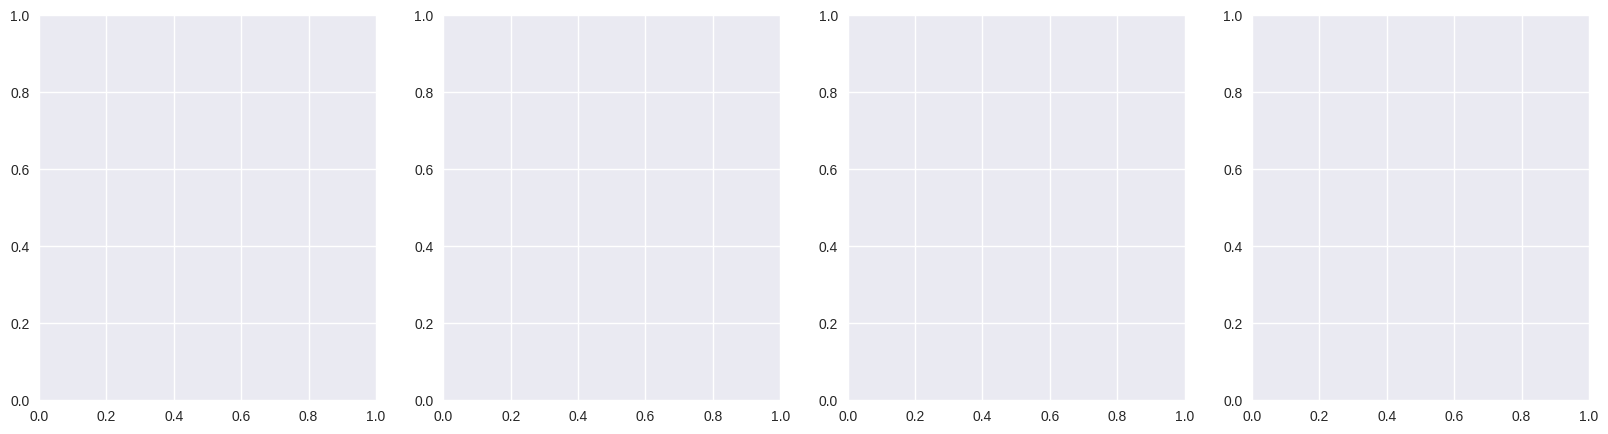

In [22]:
file_name = "cluster_mode_res/drama_sci-fi.csv"
metric = 'test_Y_NDCG_10'
plt.style.use("seaborn-v0_8")
color = sns.color_palette("tab10")
palette = {"separate": color[1], "joint": color[0]}
df = pd.read_csv(file_name,index_col=0)
df.reset_index(drop=True,inplace=True)
df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
df['total_cluster'] = df.loc[pd.notnull(df['total_cluster']),'total_cluster'].astype(int)
df['total_cluster'] = df['total_cluster'].fillna(0)
df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
#calculate the UGF
df_new = df[["test_Y_MRR_male","test_Y_HR_5_male","test_Y_HR_10_male","test_Y_NDCG_5_male","test_Y_NDCG_10_male"]].subtract(df[["test_Y_MRR_female","test_Y_HR_5_female","test_Y_HR_10_female","test_Y_NDCG_5_female","test_Y_NDCG_10_female"]].values)
df[["test_Y_MRR_UGF","test_Y_HR_5_UGF","test_Y_HR_10_UGF","test_Y_NDCG_5_UGF","test_Y_NDCG_10_UGF"]] = df_new
# Group by 'cluster_mode' and 'total_cluster' and calculate the mean
filtered_df = df[df['seed'].isin(list(range(5,10)))]
average_df = filtered_df.groupby(['cluster mode', 'total_cluster']).mean(numeric_only=True).reset_index()
average_df["total_cluster"] = average_df["total_cluster"].astype('int')
average_df['is_baseline'] = average_df['is_baseline'].astype('bool')
average_df = average_df.sort_values(by='total_cluster')
# calculate mean baseline value
baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()
baseline_df['is_baseline'] = baseline_df['is_baseline'].astype('bool')
average_df = pd.concat([average_df, baseline_df], axis=0)
fig, axes = plt.subplots(1,4,figsize=(20,5))
metric_name = '@'.join(metric.split('_')[-2:])
seed = 6
#female
sns.lineplot(data=average_df[(average_df['seed']==seed) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette) 

In [23]:
df

is_baseline  seed cluster_number cluster mode  test_Y_MRR  test_Y_NDCG_5  \
0          False     5      50,50,100     separate    0.138669       0.123133   
1          False     5    100,100,200     separate    0.140346       0.121797   
2          False     5    150,150,300     separate    0.134097       0.117009   
3          False     5    200,200,400     separate    0.148233       0.133625   
4          False     5    250,250,500     separate    0.142601       0.126001   
..           ...   ...            ...          ...         ...            ...   
100        False     9    350,350,700        joint    0.146293       0.126555   
101        False     9    400,400,800        joint    0.147042       0.128437   
102        False     9    450,450,900        joint    0.149514       0.135616   
103        False     9   500,500,1000        joint    0.146926       0.131101   
104         True     9            NaN          NaN    0.140514       0.126018   

     test_Y_NDCG_10  test_Y_HR_5  test_Y_HR_10  test_Y_MRR_male  ...  \
0          0.143641     0.222670      0.317606         0.146298  ...   
1          0.146938     0.214039      0.331415         0.147209  ...   
2          0.142597     0.215765      0.334868         0.130329  ...   
3          0.155025     0.239931      0.340046         0.147542  ...   
4          0.145967     0.222670      0.315880         0.147661  ...   
..              ...          ...           ...              ...  ...   
100        0.151006     0.217491      0.331415         0.152758  ...   
101        0.147561     0.222670      0.310702         0.151888  ...   
102        0.150979     0.243383      0.314154         0.157569  ...   
103        0.150058     0.233026      0.321059         0.149372  ...   
104        0.148345     0.238205      0.341772         0.146780  ...   

     test_Y_NDCG_5_female  test_Y_NDCG_10_female  test_Y_HR_5_female  \
0                0.088163               0.113154            0.162651   
1                0.096625               0.117722            0.180723   
2                0.132220               0.145823            0.216867   
3                0.132113               0.150926            0.207831   
4                0.102099               0.122885            0.171687   
..                    ...                    ...                 ...   
100              0.103223               0.122297            0.189759   
101              0.104586               0.120357            0.171687   
102              0.103773               0.121827            0.207831   
103              0.117841               0.131466            0.189759   
104              0.102652               0.110202            0.198795   

     test_Y_HR_10_female  total_cluster  test_Y_MRR_UGF  test_Y_HR_5_UGF  \
0               0.280120          100.0        0.039935         0.074192   
1               0.280120          200.0        0.035928         0.041183   
2               0.280120          300.0       -0.019727        -0.001362   
3               0.298193          400.0       -0.003620         0.039679   
4               0.271084          500.0        0.026491         0.063022   
..                   ...            ...             ...              ...   
100             0.280120          700.0        0.033846         0.034281   
101             0.243976          800.0        0.025368         0.063022   
102             0.289157          900.0        0.042168         0.043947   
103             0.253012         1000.0        0.012803         0.053484   
104             0.234940            0.0        0.032806         0.048715   

     test_Y_HR_10_UGF  test_Y_NDCG_5_UGF  test_Y_NDCG_10_UGF  
0            0.046338           0.043227            0.037686  
1            0.063407           0.031116            0.036115  
2            0.067675          -0.018802           -0.003989  
3            0.051736           0.001870            0.005066  
4            0.055374           0.029545            0.028532  
..         